In [1]:
!pip install seaborn==0.11

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     |████████████████████████████████| 283 kB 4.3 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
/kaggle/input/kaggle-survey-2018/SurveySchema.csv
/kaggle/input/kaggle-survey-2018/freeFormResponses.csv
/kaggle/input/kaggle-survey-2018/multipleChoiceResponses.csv
/kaggle/input/kaggle-survey-2019/survey_schema.csv
/kaggle/input/kaggle-survey-2019/multiple_choice_responses.csv
/kaggle/input/kaggle-survey-2019/other_text_responses.csv
/kaggle/input/kaggle-survey-2019/questions_only.csv
/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_methodology.pdf
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_answer_choices.pdf


In [2]:
#importing the necessary packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import matplotlib.gridspec as gridspec
import matplotlib_venn as vplt
plt.rcParams['figure.dpi'] = 200 #high resolution

In [3]:
#reading the datasets
data_20 = pd.read_csv('../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv',low_memory=False)
data_19 = pd.read_csv('../input/kaggle-survey-2019/multiple_choice_responses.csv',low_memory=False)
data_18 = pd.read_csv('../input/kaggle-survey-2018/multipleChoiceResponses.csv',low_memory=False)

In [4]:
#Seperating the first row that has the Questions from the rest of the data
Questions_20 = data_20.iloc[0]
data_20 = data_20.iloc[1:]
Questions_18 = data_18.iloc[0]
data_18 = data_18.iloc[1:]
Questions_19 = data_19.iloc[0]
data_19 = data_19.iloc[1:]

#colors='#DEE4E7'

 # **KAGGLE vs COLAB - Clash Of The Brothers**

![image.jpg](https://mksaad.files.wordpress.com/2019/08/imgonline-com-ua-twotoone-wjrvv5send9ld.jpg)

When a person starts his or her DataScience Journey the two names he surely comes across are Kaggle and Google Colab.

* Kaggle, a subsidiary of Google LLC, is an online community of data scientists and machine learning practitioners. Kaggle allows users to find and publish data sets, explore and build models in a web-based data-science environment, work with other data scientists and machine learning engineers, and enter competitions to solve data science challenges.

* Colaboratory, or “Colab” for short, is a product from Google Research. Colab allows anybody to write and execute arbitrary python code through the browser, and is especially well suited to machine learning, data analysis and education. More technically, Colab is a hosted Jupyter notebook service that requires no setup to use, while providing free access to computing resources including GPUs.

Kaggle and Colab, both part of google, are in a constant contest of supremacy, both providing almost same set of services with regards to writing and deploying data analysis or machine learning applications, can be considered brothers. And as we all know about relationships between siblings (Especially me, considering i have a elder sister) , there is always a bitter sweet rivalry between the two. 
![bickering siblings.png](https://tiredmomsupermom.com/wp-content/uploads/2020/04/Effective-And-Simple-Tips-To-Stop-Sibling-Rivalry-And-Bickering-1.png)

This rivalry between the siblings is very interesting, It has been covered in many Blog Posts, News Reports, Kaggle Discussion forums, and is a topic that has been heatedly discussed, some prefering the former while others the latter, Everyone has their own opinions, and whenever a beginner searches online and asks the question, which one of the two is better, they get conflicting advices.



# Purpose

The purpose of this Notebook is to understand if between the two brothers, one is more supreme than the other, and does better than the other in the intersection of the services they provide, this will be done by using the survey data.


# Dataset

Its fourth year since Kaggle has been conducting its annual Machine Learning and Data Science Survey. The 2020 Kaggle Machine Learning and Data Science Survey will be the dataset we will use as our primary dataset, we will also use 2018 and 2019 Kaggle ML & DS Survey Datasets as our secondary dataset, I did not include the 2017 dataset, as i wanted to keep the information as fresh as possible, in the same spirit the 2019 and 2018 data is used very minimally 


# Methodology

For our analysis we are going to focus on the two areas where the functionality of Colab and Kaggle intersects, namely
1. As Hosted Notebook
2. As a platform to share and deploy Data Analysis and Machine Learning Applications

We will keep both of these metrics seperate, analyse them separately, and use them to analyse which of the platform is better, Kaggle or Colab.

In case of the platform's use as a hosted notebook
1. Popularity - Judged by the number of users who use them for the given task
2. Growth - Comparing the trend of rise in popularity in three year, 2018,2019,2020
3. Usage by Coders - Comparing experience in coding with the hosted notebook used
4. Usage by Machine Learners - Comparing experience in using Machine learning Methods with the hosted notebook used
5. Popularity with Age groups - Comparing the Age groups, with the hosted notebook prefered
6. Language Friendliness - Comparing prefered language vs prefered hosted notebook

In case of the platform's use as a platform to share and deploy Machine learning Methods and Data Analysis
1. Popularity - Judged by the number of users who use them for the given task
2. Usage by Machine Learners - Comparing experience in using Machine learning Methods with the Platform used
3. Usage by people in the data science field - Comparing the people in Data Science Field with the Platform they use
4. Usage of the Platform w.r.t Other Platforms - Checking if the users who use one of the platforms use another one

As we continue with the story of the two brothers you will understand the reason why these parameters were chose

Also, for Platform used to deploy Machine Learning Algorithms, the 2018 and 2019 survey did not have this question asked, so i could not compare the growth in Popularity

Obviously, both the platforms have their own set of pros and cons, and it depends on an individual and his/her needs that can make them choose one or the other, but keeping that in mind, lets use the survey to learn which one of the two brothers do more people like.


# Insights from the Whole Analysis

1.) Colab is the most popular in the field of Hosted Notebooks.

2.) Colab has had a rapid growth rate, if this continues, and if its competitors don't keep up with it's growth rate, Colab might become the King of Hosted Notebooks, beating every other Platform in this area, in the next few years.

3.)Colab is very beginner friendly when it comes to writing Code, especially Code which utilises Machine Learning Methods to solve a given problem, atleast when compared to its counterparts.

4.)Colab seems to have gained alot of its populartiy in the last two years, and thus the trend of people with less than 2 years of coding experience using Colab more seems to make a bit more sense.

5.)Kaggle does so much better than Colab in case of Popularity among R users, because Colab unlike Kaggle does not support R language, supports only Python and Swift. If you are a R user, and work primarily in R, then Kaggle is the Place to go to, Kaggle Notebooks support writing code in R, and there are more chances you will find other Kernels written in R in Kaggle than in Colab

6.)GitHub is the most popular Platform for sharing and deploying Code.

7.)Even when Kaggle and Colab are Platforms build specifically for Data Science, the people in Data Science use Github more than the above mentioned Platforms.

8.)People who use Kaggle or Colab usually use them in conjecture with using Github. Perhaps it is because the employers usually look at github profiles to decide if they want to hire and individual or not, so most of the Kaggle and Colab users have to upload their codes on Github as well.

# 1. As a Hosted Notebook Products?

Google Colab and Kaggle both provide hosted notebook services, Which are essential in a day to day workflow of a Data Scientist, Lets now compare them and see which is better, and see if any other platform gives these both a run for their money


# 1.1 Popularity

Text(0.5, 1.0, 'Hosted Notebook Products Used')

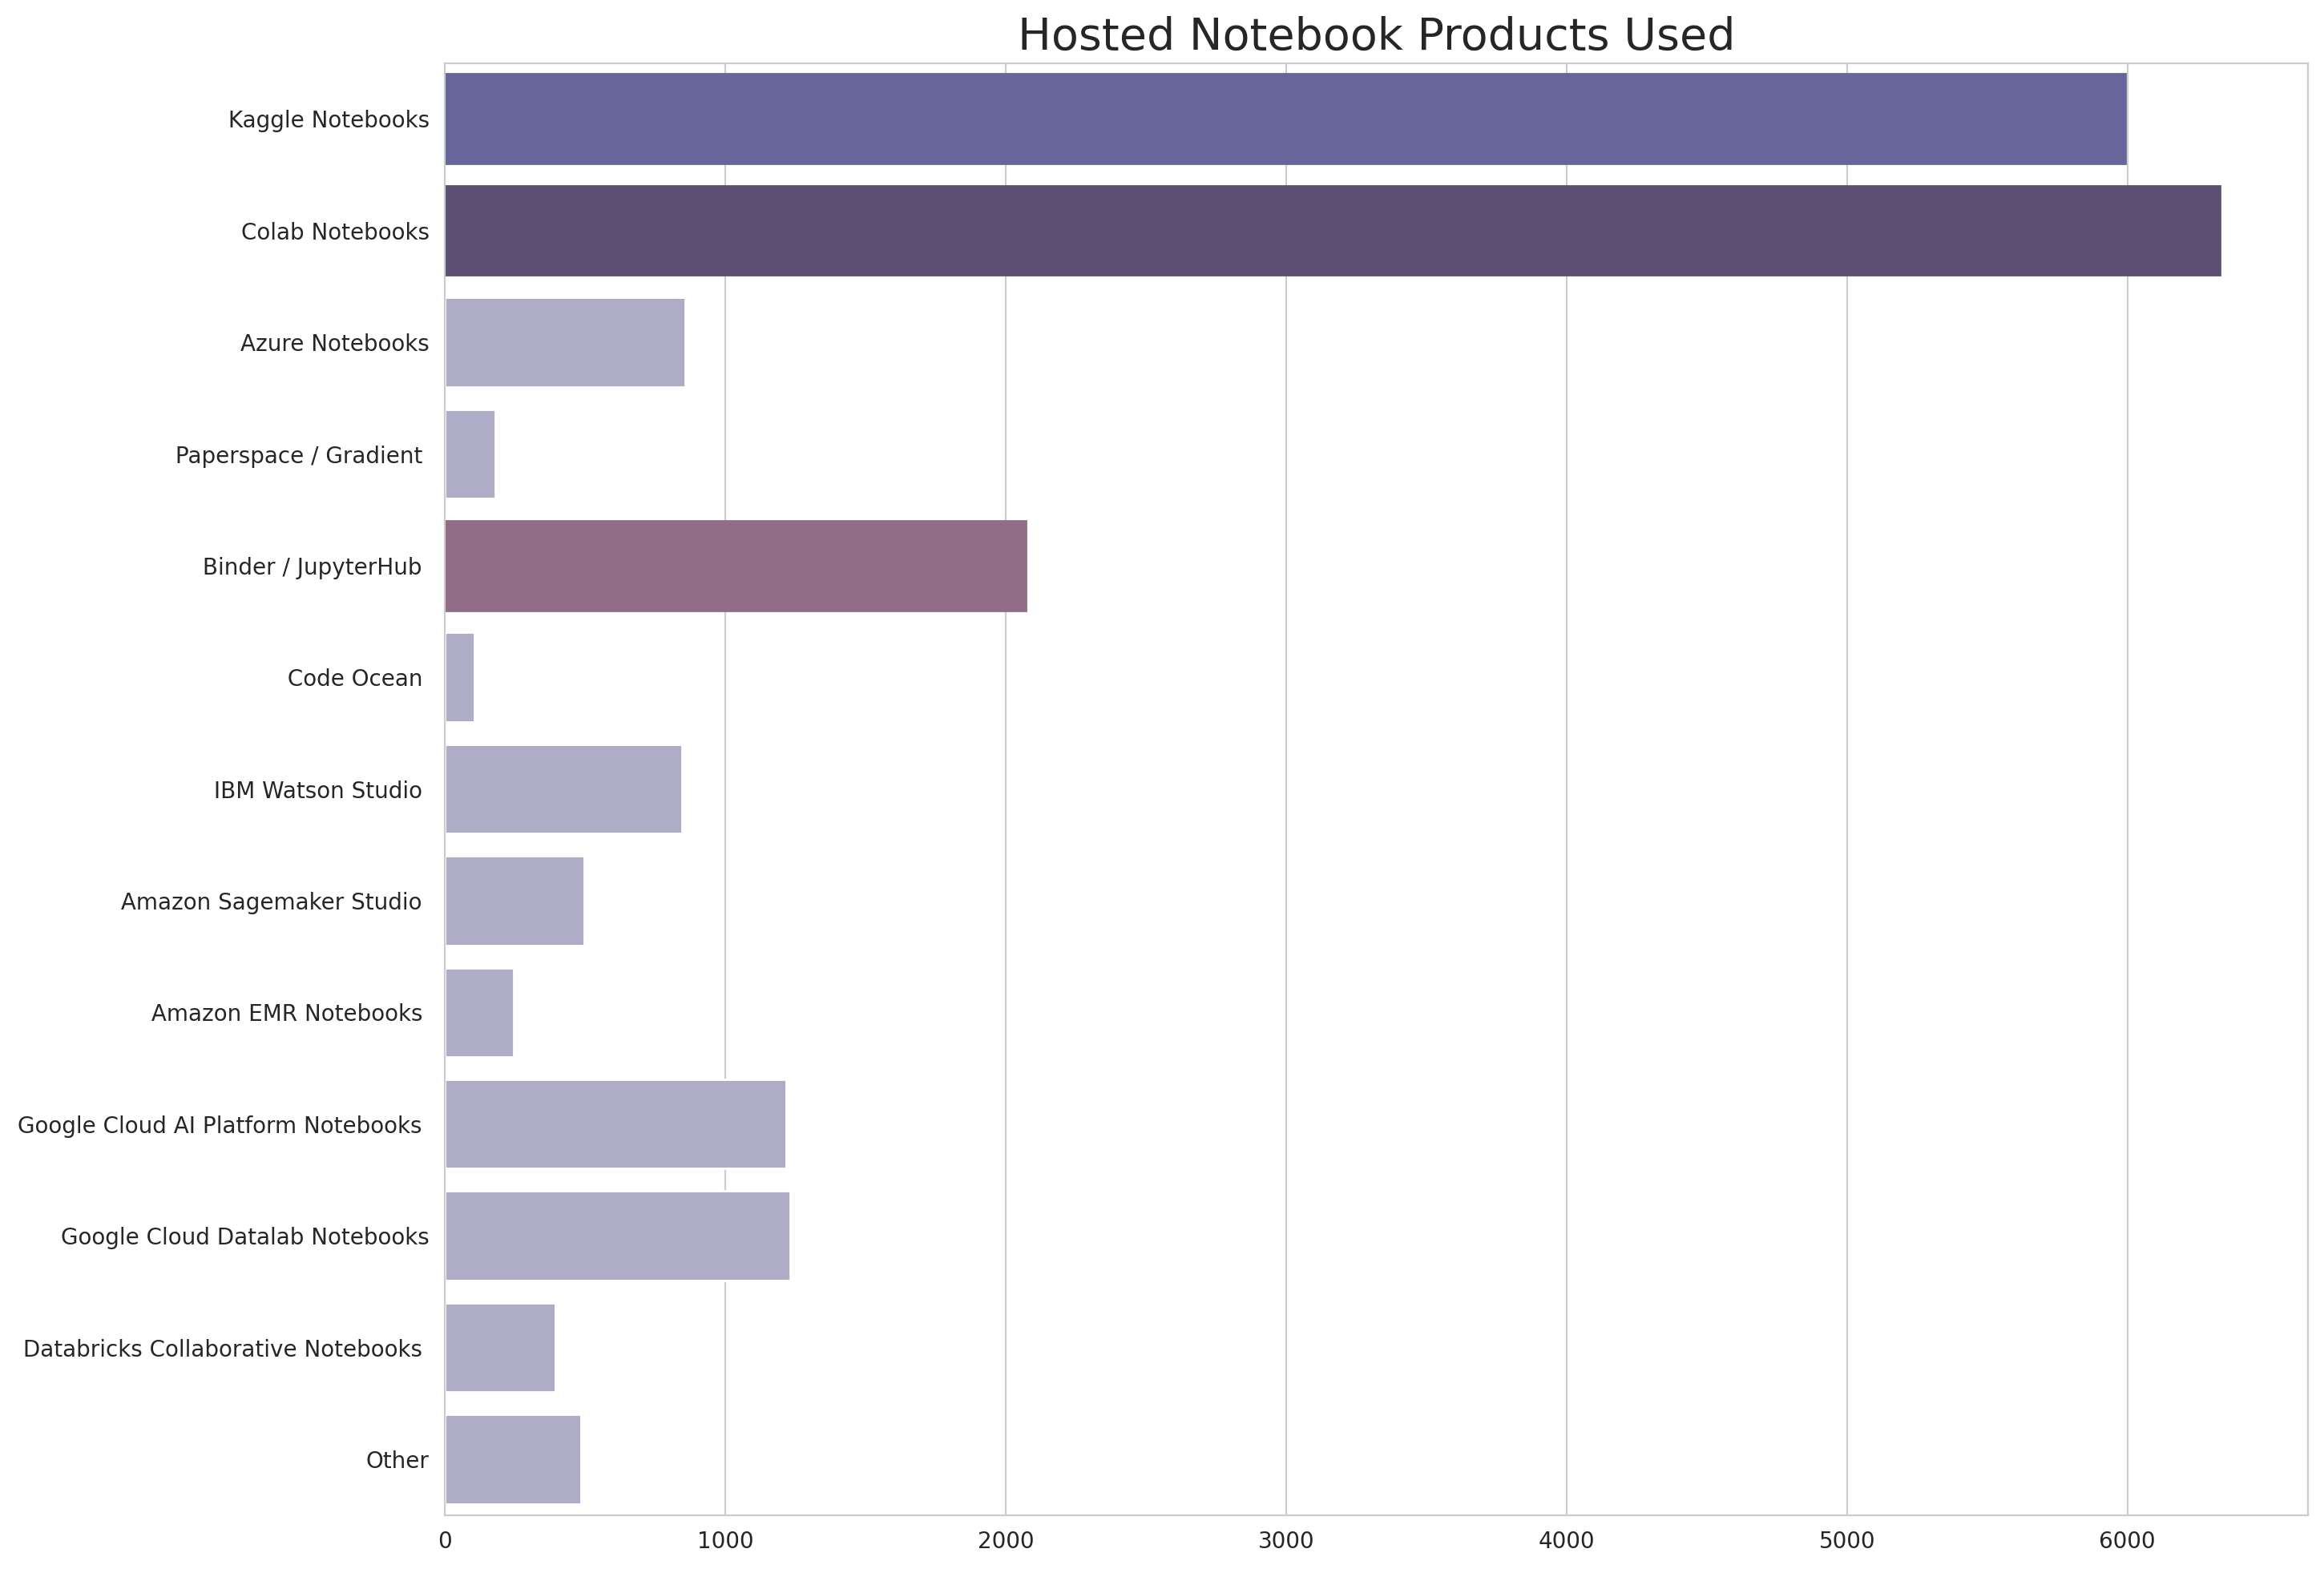

In [5]:
#Creating an empty list to store the name of the notebooks and number of respondents who use it
Notebook_names = []
Notebook_popularity = []

#We are iterating over the for loop and entering appropriate values in the empty list
#using string concatenation to get Column names like 'Q10_Part_ + str(1)'='Q10_Part_1'
for x in range(1,13):
    Notebook_names.append(data_20['Q10_Part_'+str(x)].dropna().unique()[0])
Notebook_names.append(data_20['Q10_OTHER'].dropna().unique()[0])


for y in range(1,13):
    Notebook_popularity.append(data_20['Q10_Part_'+str(y)].dropna().count())
Notebook_popularity.append(data_20['Q10_OTHER'].dropna().count())
                     
#Plotting the graph, using seaborn to plot the bar graph using sns.barplot 
plt.figure(figsize=(15,12))
sns.set_style('whitegrid')
sns.barplot(y=Notebook_names,x=Notebook_popularity,color='#aaa7cc')

#We are accessing the axis using plt.gca() and storing it in the axis funtion, then getting the bars, children
#of the axis object via .get_children() and setting the color of the individual bar via .set_color()
ax=plt.gca()
ax.get_children()[0].set_color('#66669a')
ax.get_children()[1].set_color('#5C5174')
ax.get_children()[4].set_color('#926d88')
plt.title('Hosted Notebook Products Used',size=20)


Well its clear that both of the brothers are at the top in comparision to all the other platforms that provide such services, the closest any one has come to them is Binder/Jupyterhub, and it is still very far behind the siblings, all of the
others are far behind in terms of popularity.

Now back to the story of the brothers, it seems that google colab got the upper hand here but by a very low margin, both are almost equal to each other.
Seems the siblings are in close competition and in a few years perhaps one of them will get the upper hand


# 1.2 Growth


Let's try and see how both the brothers have evolved as they have grown, we will use the 2018, 2019, and 2020 data for this

In [6]:


#Cleaning 2018 data
replace = {"Q14_Part_1" : {'Kaggle Kernels':' Kaggle Notebooks'},
           "Q14_Part_2" : {'Google Colab' : 'Colab Notebooks'},
           "Q14_Part_9" : {'JupyterHub/Binder': ' Binder / JupyterHub '}
            }
data_18.replace(replace,inplace=True)

#Working with the 2018 Data

#Creating an empty list to store the name of the notebooks and number of respondents who use it
Notebook_18 = []
Notebook_18_values = []

#We are iterating over the for loop and entering appropriate values in the empty list
#using string concatenation to get Column names like 'Q10_Part_ + str(1)'='Q10_Part_1'
for x in range(1,3):
    Notebook_18.append(data_18['Q14_Part_'+str(x)].dropna().unique()[0])
Notebook_18.append(data_18['Q14_Part_9'].dropna().unique()[0])

for y in range(1,3):
    Notebook_18_values.append(data_18['Q14_Part_'+str(y)].dropna().count())
Notebook_18_values.append(data_18['Q14_Part_9'].dropna().count())
    
#Cleaning 2019 data
replace = {"Q17_Part_1" : {' Kaggle Notebooks (Kernels) ':' Kaggle Notebooks'},
           "Q17_Part_2" : {' Google Colab ' : 'Colab Notebooks'}
            }
data_19.replace(replace,inplace=True)

#Working with 2019 Graph    

#Creating an empty list to store the name of the notebooks and number of respondents who use it
Notebook_19 = []
Notebook_19_values = []



#We are iterating over the for loop and entering appropriate values in the empty list
#using string concatenation to get Column names like 'Q10_Part_ + str(1)'='Q10_Part_1'
for x in range(1,3):
    Notebook_19.append(data_19['Q17_Part_'+str(x)].dropna().unique()[0])
Notebook_19.append(data_19['Q17_Part_7'].dropna().unique()[0])


for y in range(1,3):
    Notebook_19_values.append(data_19['Q17_Part_'+str(y)].dropna().count())  
Notebook_19_values.append(data_19['Q17_Part_7'].dropna().count())

#Working with the 2020 data

#Creating an empty list to store the name of the notebooks and number of respondents who use it
Notebook_20 = []
Notebook_20_values = []

#We are iterating over the for loop and entering appropriate values in the empty list
#using string concatenation to get Column names like 'Q10_Part_ + str(1)'='Q10_Part_1'
for x in range(1,3):
    Notebook_20.append(data_20['Q10_Part_'+str(x)].dropna().unique()[0])
Notebook_20.append(data_20['Q10_Part_5'].dropna().unique()[0])


for y in range(1,3):
    Notebook_20_values.append(data_20['Q10_Part_'+str(y)].dropna().count())
Notebook_20_values.append(data_20['Q10_Part_5'].dropna().count())

#Converting the Notebook_20_values from raw numbers to percentage,
#This is done as the number of respondents to the survey each year were not same, so using raw numbers will be 
#misleading.
#If you have trouble understanding the code below, we are using a list comprehension here, you can search it 
#on google 
Notebook_20_per = [((i/data_20.shape[0])*100) for i in Notebook_20_values]
Notebook_19_per = [((i/data_19.shape[0])*100) for i in Notebook_19_values]
Notebook_18_per = [((i/data_18.shape[0])*100) for i in Notebook_18_values]

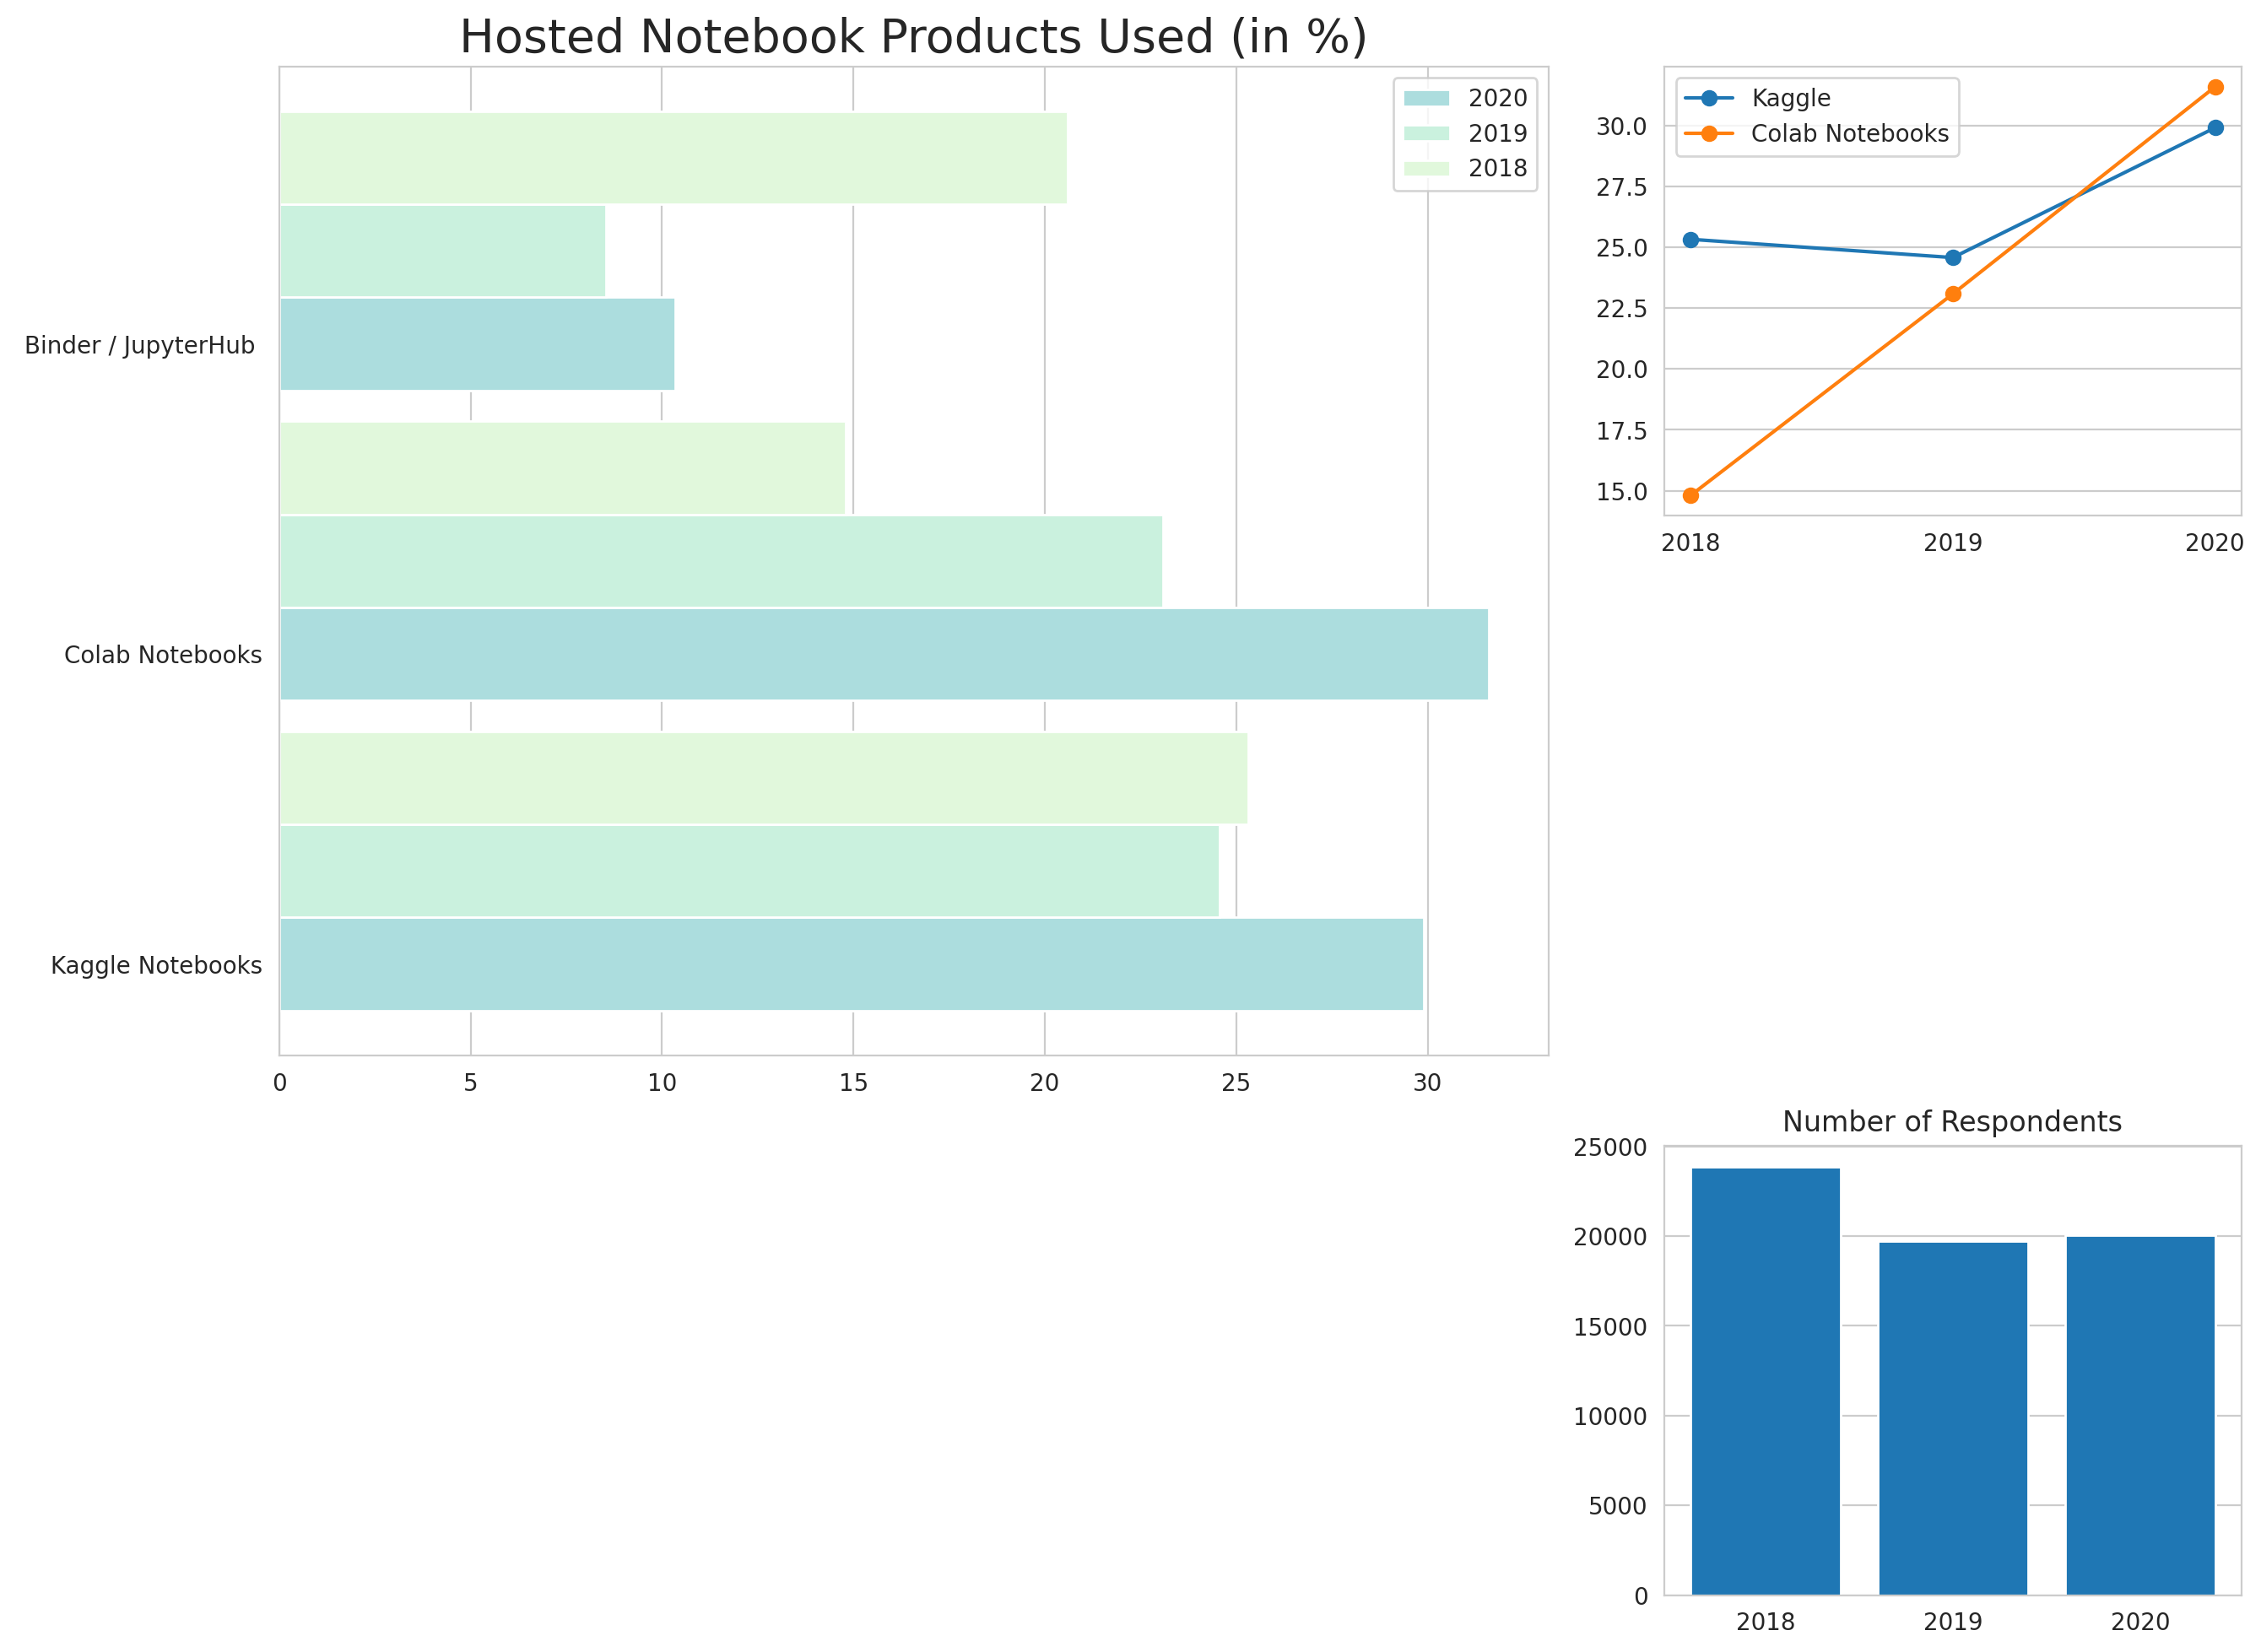

In [7]:
plt.figure(figsize=(15,12))

#We are using Gridspec here, to plot the subplots
gspec = gridspec.GridSpec(3, 3)
sns.set_style('whitegrid')

#Ploting the first subplot
plt.subplot(gspec[0:2,0:2])

#Plotting the 2020 Graph,
#We are using Matplotlib's barh function for that
plt.barh(y=Notebook_20,width=Notebook_20_per,color='#ACDDDE',height=0.3)


#Getting the location of x-ticks,in the loc variable and setting up for the next bars
locs, label = plt.yticks()

#in the x-ticks location we add the width of our current bar, this is done in order plot the bars side by side
#we create an empty list new_xvals1 which will be filled with the y-pos of the second set of bars
new_xvals1 = []   

for item in locs:
    new_xvals1.append(item+0.3)
    

#Plotting the 2019 Graph
plt.barh(y=new_xvals1,width=Notebook_19_per,color='#CAF1DE',height=0.3)
 
#setting up for the next bars 
#in the x-ticks location we add the width of our current bar 2 times, this is done in order plot the three bars side by side
#we create an empty list new_xvals1 which will be filled with the y-pos of the third set of bars
new_xvals2 = []   

for item in locs:
    new_xvals2.append(item+0.6)

#Plotting the 2018 Graph                     

plt.barh(y=new_xvals2,width=Notebook_18_per,color='#E1F8DC',height=0.3)

#we access th axes object via plt.gca(), and remove the yaxis grids by ax.yaxis.grid(False) code
ax=plt.gca()
ax.yaxis.grid(False)

plt.title('Hosted Notebook Products Used (in %)',size=20)
plt.legend(['2020','2019','2018'])

#plotting the second subplot
plt.subplot(gspec[2,2])

#dat variable stores the y, and dat_values stores the number of repondents for the given years, then we plot the bar graph
dat = ['2018','2019','2020']
dat_values = []
dat_values.append(data_18.shape[0])
dat_values.append(data_19.shape[0])
dat_values.append(data_20.shape[0])
plt.bar(dat,dat_values)
plt.title('Number of Respondents')
ax=plt.gca()
ax.xaxis.grid(False)

#plotting the third subplot
plt.subplot(gspec[0,2])

#We store years in Notebook_year variable, and create two empty lists, Notebook_yv_K and Notebook_yv_C, to store the Kaggle and Colabs Percentage
#Popularity in the years 2018,2019,and 2020
Notebook_year = ['2018','2019','2020']
Notebook_yv_K = []
Notebook_yv_C = []

Notebook_yv_K.append(Notebook_18_per[0])
Notebook_yv_K.append(Notebook_19_per[0])
Notebook_yv_K.append(Notebook_20_per[0])
Notebook_yv_C.append(Notebook_18_per[1])
Notebook_yv_C.append(Notebook_19_per[1])
Notebook_yv_C.append(Notebook_20_per[1])


#We Plot two lines, one for Kaggle, and the other for Colab 
plt.plot(Notebook_year,Notebook_yv_K,'-o')
plt.plot(Notebook_year,Notebook_yv_C,'-o')
ax=plt.gca()
ax.xaxis.grid(False)
plt.legend(['Kaggle','Colab Notebooks'])


#THIS IS AN Alternate style for the third subplot, you can check it out.

#fig=plt.gcf()
#ax.axes.get_yaxis().set_visible(False)
#sns.despine(fig=fig)
#ax.text(-0.1, 25.8, "25.3", transform=ax.transData,color='#301934')
#ax.text(0.9, 25.1, "24.6", transform=ax.transData,color='#301934')
#ax.text(1.9, 30.4, "29.9", transform=ax.transData,color='#301934')
#ax.text(-0.1, 15.3, "14.8", transform=ax.transData,color='#00008B')
#ax.text(0.9, 23.6, "23.1", transform=ax.transData,color='#00008B')
#ax.text(1.9, 32.1, "31.6", transform=ax.transData,color='#00008B')


As the number of respondents each year is changing, 2018 had the most, after which there was a sharp decrease, and a minimal increase, rather than using raw count as the parameter we are using percentages for our comparision

Interesting
It seems that Kaggle was the top dog in 2018 and 2019 in the 2020 big 3, and Jupyter Hub was doing much better than google colab in 2018
But that is history now, as Colab has seen a smooth growth in popularity as its growing older, Leaving behind Jupyter Hub in 2019, and Kaggle in 2020
While, Kaggle's growth in terms of popularity was stagnant from 2018 to 2019, and saw growth in 2020, The growth is nowhere as rapid as that of Colab, which has been growing fastly and has left behind Kaggle and Binder
If, this scenario continues then in the coming years, Colab might just become the king of hosted notebooks.

# 1.3 & 1.4 Usage by Coders and Machine Learners

So, now lets compare the two brothers in terms of how popular is it among beginners and veterans

Text(0.5, 0.98, 'Experience vs Hosted Notebook Used')

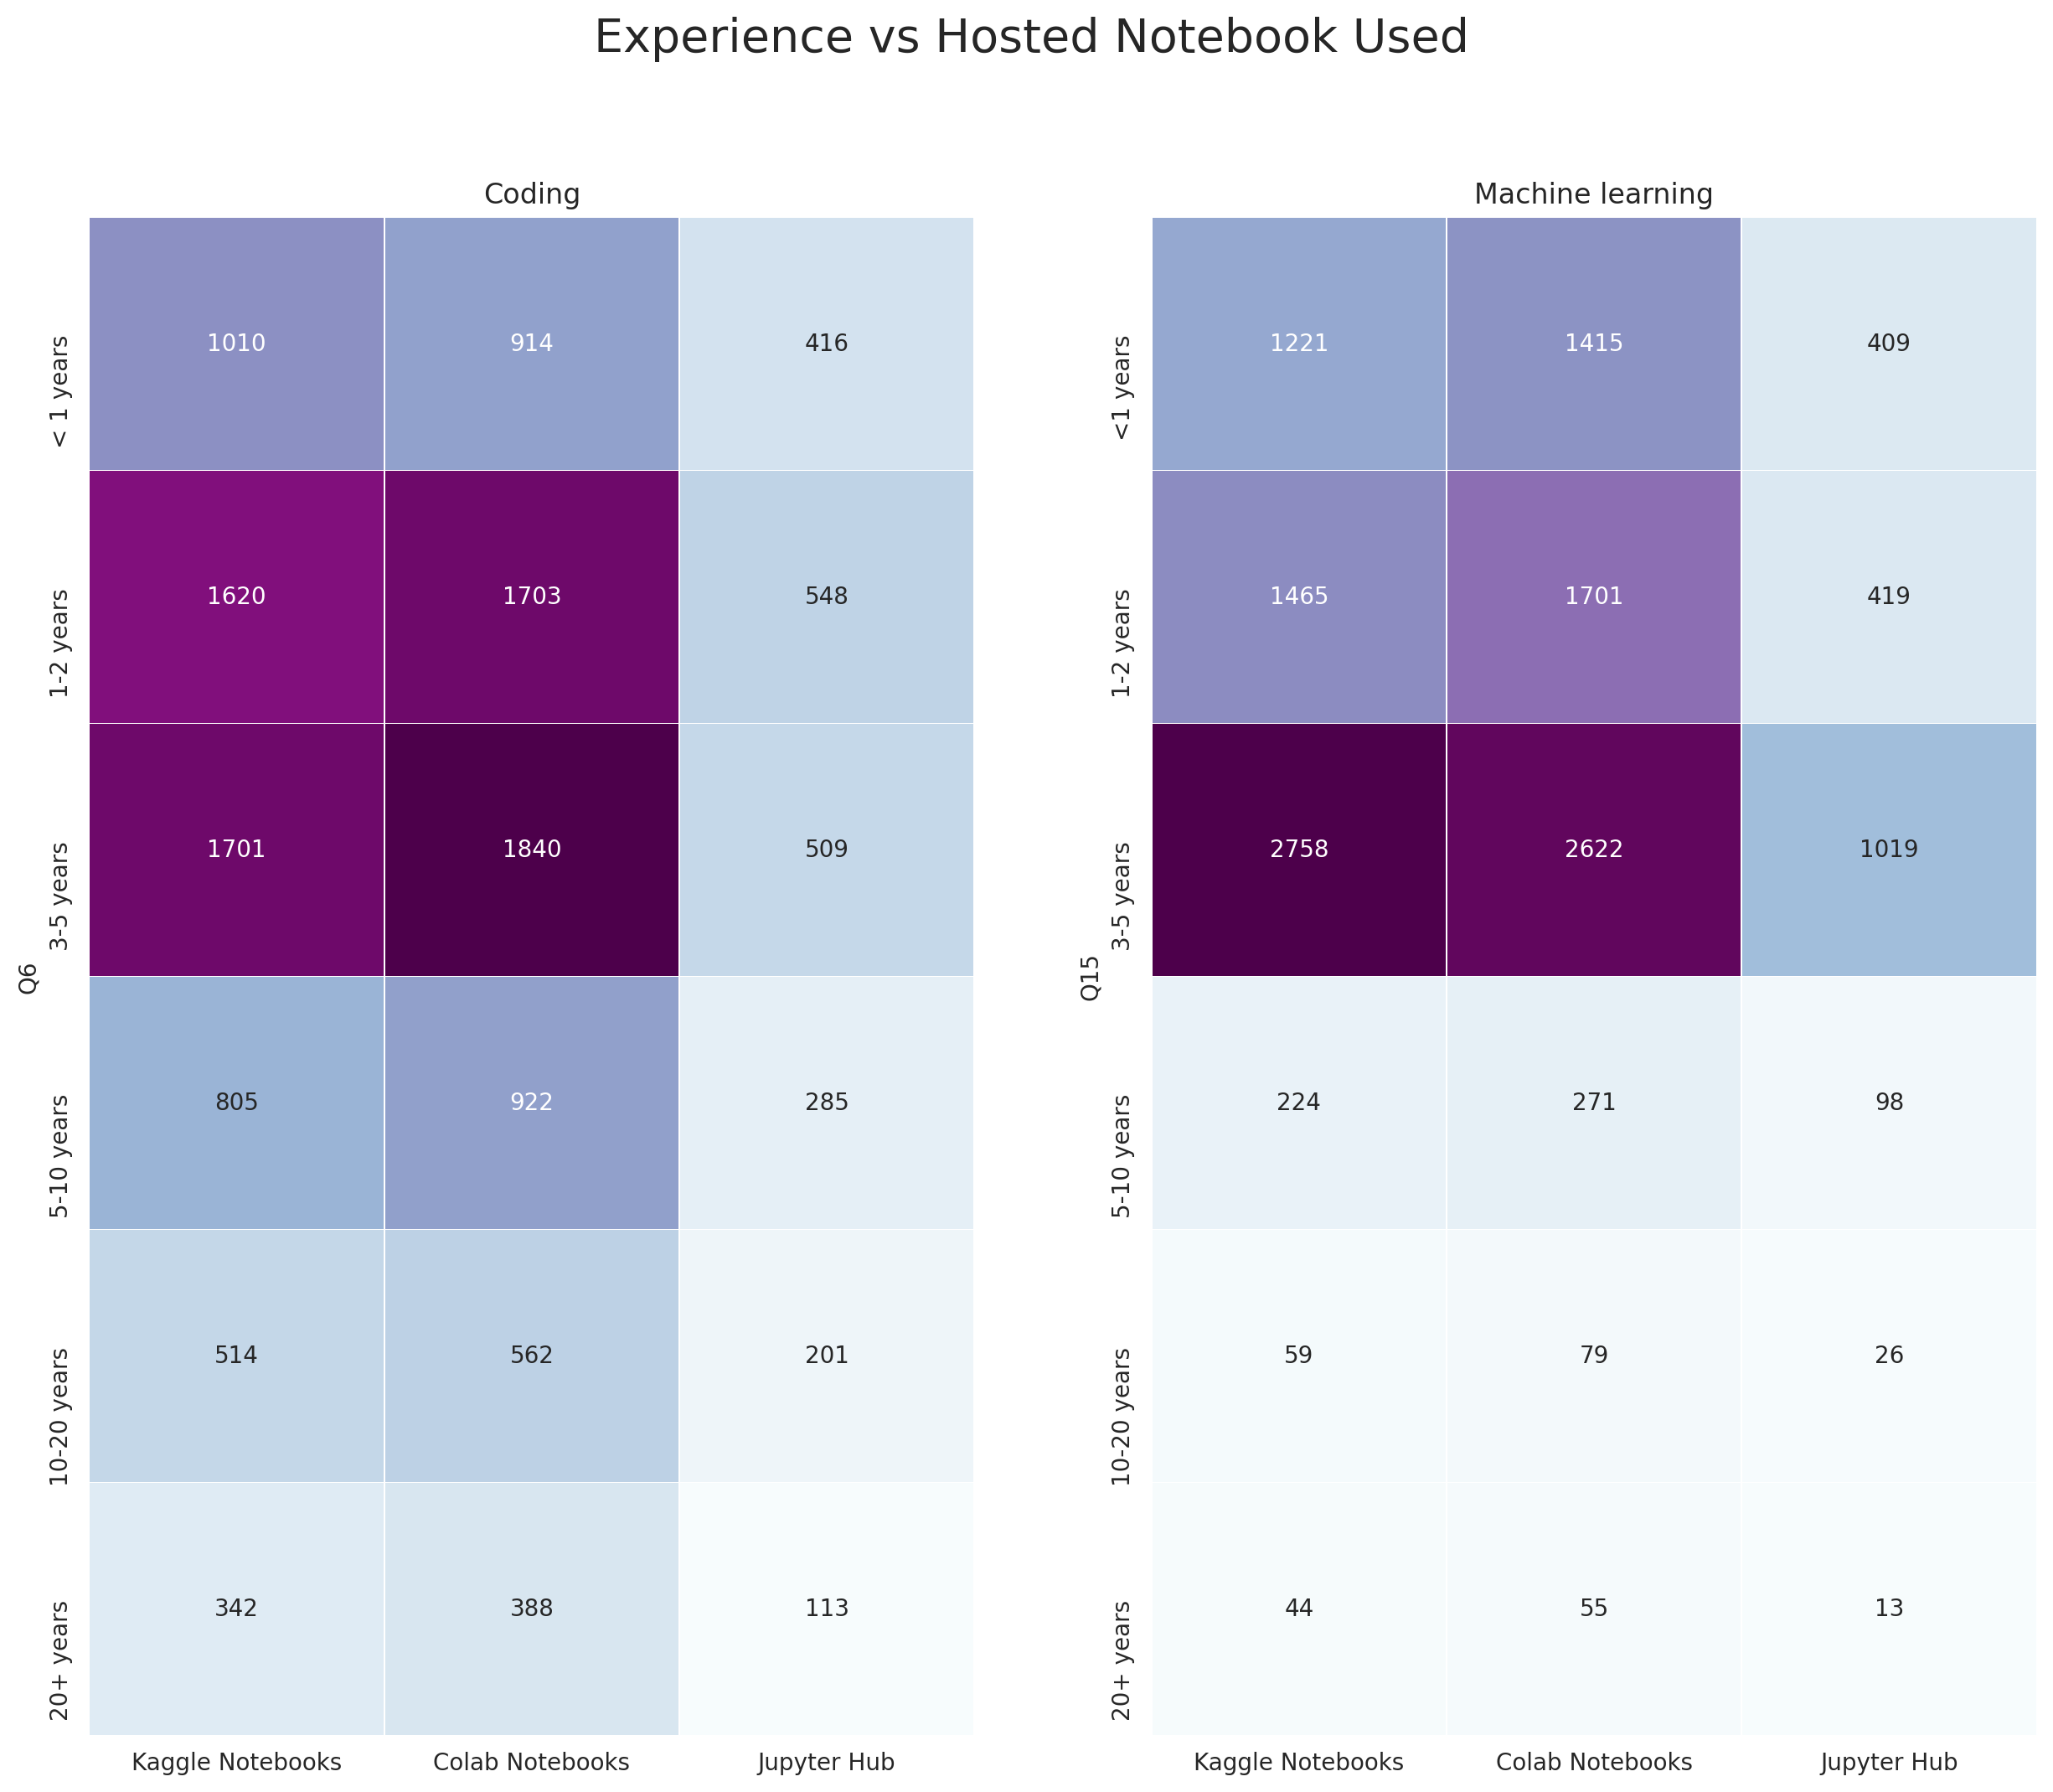

In [8]:
plt.figure(figsize=(15,12))

#Plotting the first subplot
plt.subplot(1,2,1)

#Here we are first creating a pivot table with the following columns = ["Q6",'Q10_Part_1','Q10_Part_2','Q10_Part_5'] and then grouping them w.r.t 'Q6'
#After this, we are creating a new dataframe using the pivot table, which contains the notebooks name, and their counts in the columns w.r.t the 
#no. of years a person has been coding
pivot = data_20[["Q6",'Q10_Part_1','Q10_Part_2','Q10_Part_5']].groupby("Q6")
new_data = pivot['Q10_Part_1'].count()
new_data = pd.DataFrame(new_data)
new_data.rename(columns = {'Q10_Part_1' : 'Kaggle Notebooks'},inplace=True)
new_data['Colab Notebooks'] = pivot['Q10_Part_2'].count()
new_data['Jupyter Hub'] = pivot['Q10_Part_5'].count()

#We use this block of code to rearange the y-axis ticklabels so that they are in the correct order i.e. ['<1 years',.......,'20+years']
row_index = [5,0,3,4,1,2]
new_data = new_data.iloc[row_index]

#now we are creating the heatmap, note that cbar=False removes the color bar, and annot=True will show the values on the of the heatmaps tiles, also
#fmt='d' enures that the annotation's are in integer format
sns.heatmap(new_data,linewidth=0.3,cbar=False,annot =True,fmt='d',cmap='BuPu')
plt.title('Coding')
ax = plt.gca()

#Ploting the second subplot
plt.subplot(1,2,2)

#Here we are first creating a pivot table with the following columns = ["Q15",'Q10_Part_1','Q10_Part_2','Q10_Part_5'] and then grouping them w.r.t 'Q15'
#After this, we are creating a new dataframe using the pivot table, which contains the notebooks name, and their counts in the columns w.r.t the 
#no. of years a person has been implementing ML methods
pivot = data_20[["Q15",'Q10_Part_1','Q10_Part_2','Q10_Part_5']].groupby("Q15")
new_data = pivot['Q10_Part_1'].count()
new_data = pd.DataFrame(new_data)
new_data.rename(columns = {'Q10_Part_1' : 'Kaggle Notebooks'},inplace=True)
new_data['Colab Notebooks'] = pivot['Q10_Part_2'].count()
new_data['Jupyter Hub'] = pivot['Q10_Part_5'].count()

#We use this block of code to rearange the y-axis ticklabels so that they are in the correct order i.e. ['<1 years',.......,'20+years']
row_index = [7,8,0,2,4,5,6,1,3]
new_data = new_data.iloc[row_index]

#This block of code is writen so that the category the categories of the first subplot 'coding vs notebook' and the second subplot 'Ml vs notebook',
#have the same set of categories in the yticklabels
#Note, this is stylisticly better, although because we are removing finer categories and making them larger, we are losing a bit of information in
#process, It is entirely your choice if you want to do this step or not, Weigh the pros and cons for your own self
new_data.loc[len(new_data)] = (new_data.iloc[0] + new_data.iloc[1])
new_data.drop(new_data.index[0],inplace = True)
new_data.drop(new_data.index[0],inplace = True)
new_data.loc[len(new_data)] = (new_data.iloc[1] + new_data.iloc[2]+new_data.iloc[3])
new_data.drop(new_data.index[[1,2,3]],inplace = True)
new_data = new_data.rename(index = {'20 or more years':'20+ years',8:'<1 years',9:'3-5 years'})

#Once again reordering the yticklabels, as the previous code removed the ordering
row_index = [5,0,4,1,2,3]
new_data = new_data.iloc[row_index]

#now we are creating the heatmap, note that cbar=False removes the color bar, and annot=True will show the values on the of the heatmaps tiles, also
#fmt='d' enures that the annotation's are in integer format
sns.heatmap(new_data,linewidth=0.3,cbar=False,annot =True,fmt='d',cmap='BuPu')
plt.title('Machine learning')

#suptitle is used for the superheading of all the subplots
plt.suptitle('Experience vs Hosted Notebook Used',size=20)




First lets talk about people who are beginner coders, It seems for people who have just gotten into coding and have been coding just for under 1 year seem to use kaggle more than its counterpart, but the difference is almost negligible, 
but as the coding experience increases more than 1 year people seem to use Colab more, specially in the case of coders who have been coding for 1-10 years, Colab seems to be doing better than Kaggle although not by a huge margin, but also not by such a small number that we might consider it nascent.
In the case of veteran coders, Colab still wins although by a neglegible margin and both can almost be considered to be equal.

So Colab has the upper hand in case of coders, but what about Machine learning beginners and veterans, Certainly Kaggle and Colab are data science centric platforms, what's the trend here.

In Case of machine learning beginners, who have been implementing machine learning for less than 2 years, the tides are in the favour of Colab, Kaggle seems to be losing by a huge margin
for machine learning intermediates and veterans nothing can be said decisively, in case of 3-5 years Kaggle gets a slight edge, but then this advantage trickles down as the experience goes up from 5 years, but still nothing decisive.

It seems that, Colab is more begginer friendly than Kaggle , especially in terms of writing machine learning applications,

Also as we saw in the previous graph (Growth Section), Colab seems to have gained alot of its populartiy in the last two years, and thus this trend of people with less than 2 years of coding experience using Colab more seems to make sense, 
Lets try and make a bit more of a sense as to why Colab saw a sudden spike in popularity in these last 2 years..

# 1.5 Popularity with Age Groups

Text(0.5, 0.98, 'Hosted Notebook Prefered vs Age')

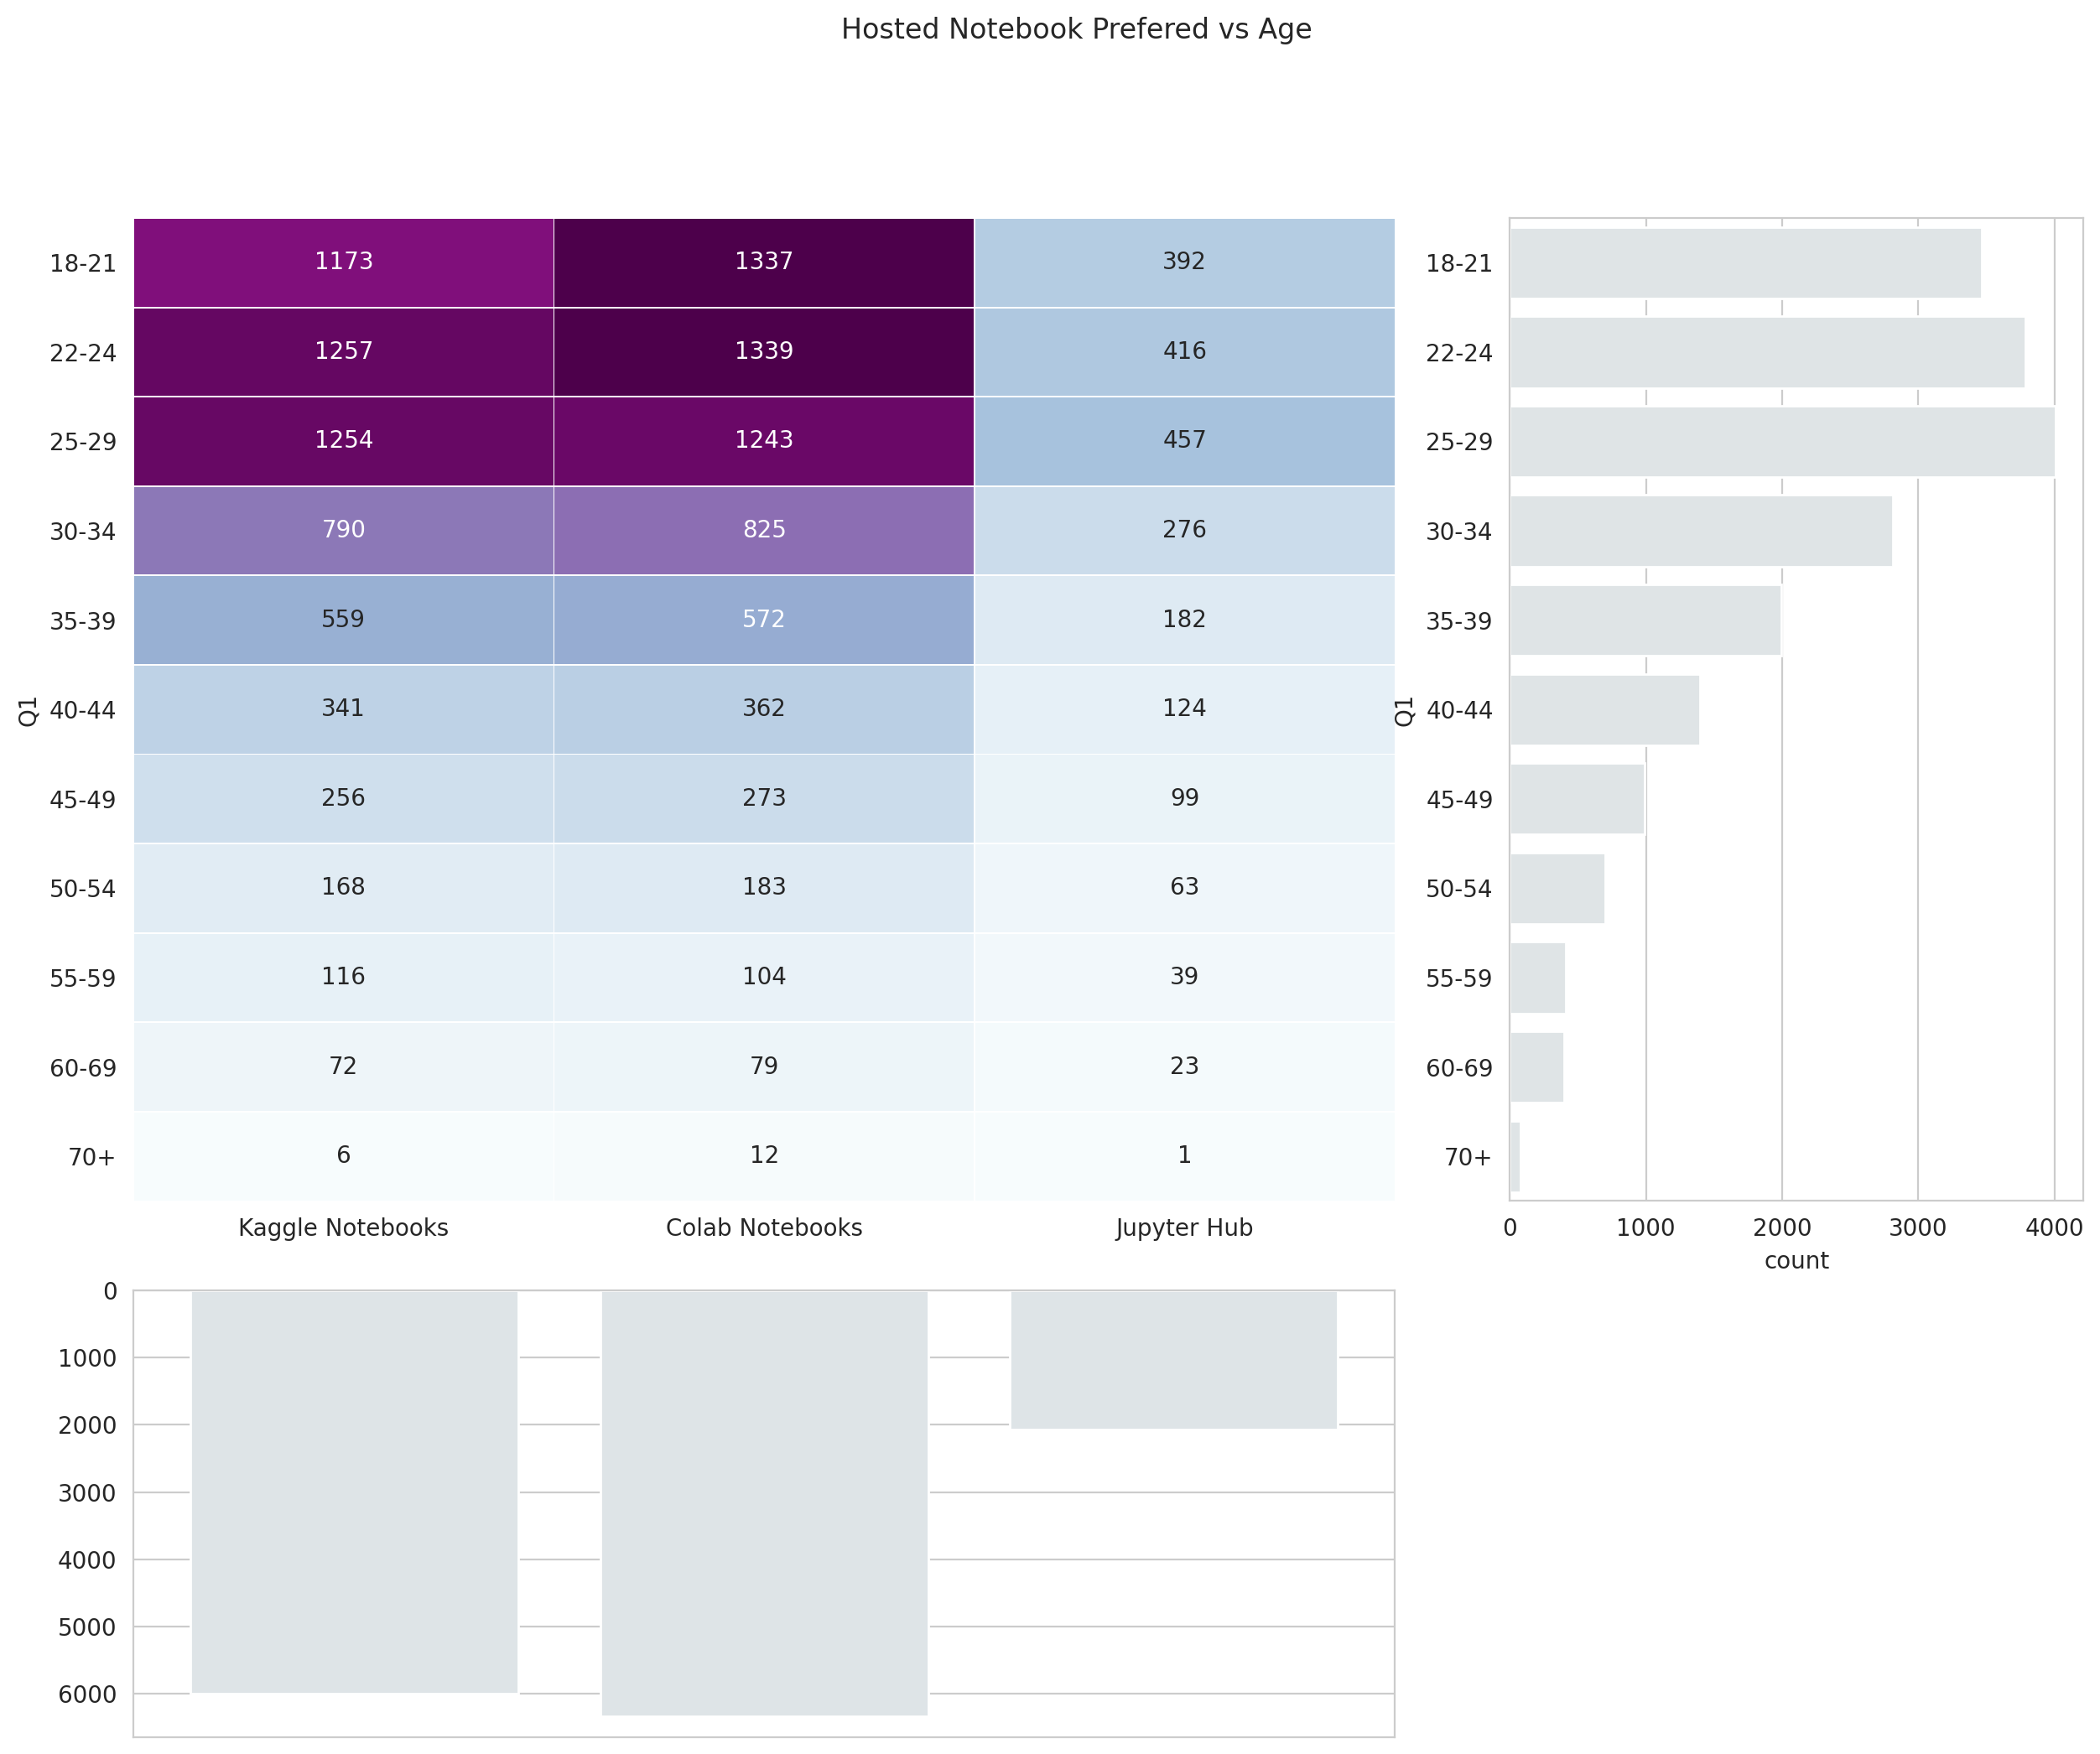

In [9]:
plt.figure(figsize=(15,12))

#We are using GridSpec to plot the subplots
gspec = gridspec.GridSpec(3, 3)
sns.set_style('whitegrid')

#plotting the first subplot
plt.subplot(gspec[0:2,0:2])

#Here we are first creating a pivot table with the following columns = ["Q1",'Q10_Part_1','Q10_Part_2','Q10_Part_5'] and then grouping them w.r.t 'Q1'
#After this, we are creating a new dataframe using the pivot table, which contains the notebooks name, and their counts in the columns w.r.t the 
#age group of the respondents
pivot = data_20[["Q1",'Q10_Part_1','Q10_Part_2','Q10_Part_5']].groupby("Q1")
new_data = pivot['Q10_Part_1'].count()
new_data = pd.DataFrame(new_data)
new_data.rename(columns = {'Q10_Part_1' : 'Kaggle Notebooks'},inplace=True)
new_data['Colab Notebooks'] = pivot['Q10_Part_2'].count()
new_data['Jupyter Hub'] = pivot['Q10_Part_5'].count()

#now we are creating the heatmap, note that cbar=False removes the color bar, and annot=True will show the values on the of the heatmaps tiles, also
#fmt='d' enures that the annotation's are in integer format
sns.heatmap(new_data,linewidth=0.3,cbar=False,annot =True,fmt='d',cmap='BuPu')
plt.yticks(rotation='horizontal')

#Plotting the second subplot
plt.subplot(gspec[0:2,2])

#we are plotting a countplot from the seaborn package, The parameter order is being used to order the yticklabels
#before this, since the questions we were doing analysis on had multiple selected, we had to write alot of code, but since in Q1, only one option 
#can be seleted, we can plot this graph easily, if using this code for your own graphs you should try and see if the graph you want to plot has the
#need for alot of code, or is it easily writable
sns.countplot(y='Q1',data=data_20,order=['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49',  '50-54', '55-59', '60-69',  '70+'],color='#DEE4E7')


#Creating an empty list to store the name of the notebooks and number of respondents who use it
Notebook = []
Notebook_values = []

#We are iterating over the for loop and entering appropriate values in the empty list
#using string concatenation to get Column names like 'Q10_Part_ + str(1)'='Q10_Part_1'
for x in range(1,3):
    Notebook.append(data_20['Q10_Part_'+str(x)].dropna().unique()[0])
Notebook.append(data_20['Q10_Part_5'].dropna().unique()[0])

for y in range(1,3):
    Notebook_values.append(data_20['Q10_Part_'+str(y)].dropna().count())
Notebook_values.append(data_20['Q10_Part_5'].dropna().count())

#Note- you don't have to write this block of code again, we already have written it and stored the values in a variable, you can just use it to create
#the graph, the reason i did it, is so that if a person see this code only and wants to understand it, he will not have to back

#Plotting the third subplot
plt.subplot(gspec[2,0:2])

#Plotting the bar graph
plt.bar(x=Notebook,height=Notebook_values,color='#DEE4E7')
ax=plt.gca()
ax.xaxis.grid(False)

#To reverse the bar graph
ax.tick_params(labelbottom=False)
plt.ylim(reversed(plt.ylim()))
plt.suptitle('Hosted Notebook Prefered vs Age')

Another win for Colab, It seems that people of young age group (18 to 24 Years) like to use Google Colab More, in (25-29 years) and (55-59) age groups Kaggle is better, but by such a low margin that it is almost neglegible.
Other, than that, I had thought that perhaps this metric could be helpful in explaining Colab's sudden spike in popularity, but unfortunately, that's not the case here.

# 1.6 Language Friendly

lets now compare which notebook do users of different languages prefer,
For this i am only considering Python and R, given how they are the most popular languages in which you can build machine learning applications

Text(0.5, 1.0, 'R vs Python')

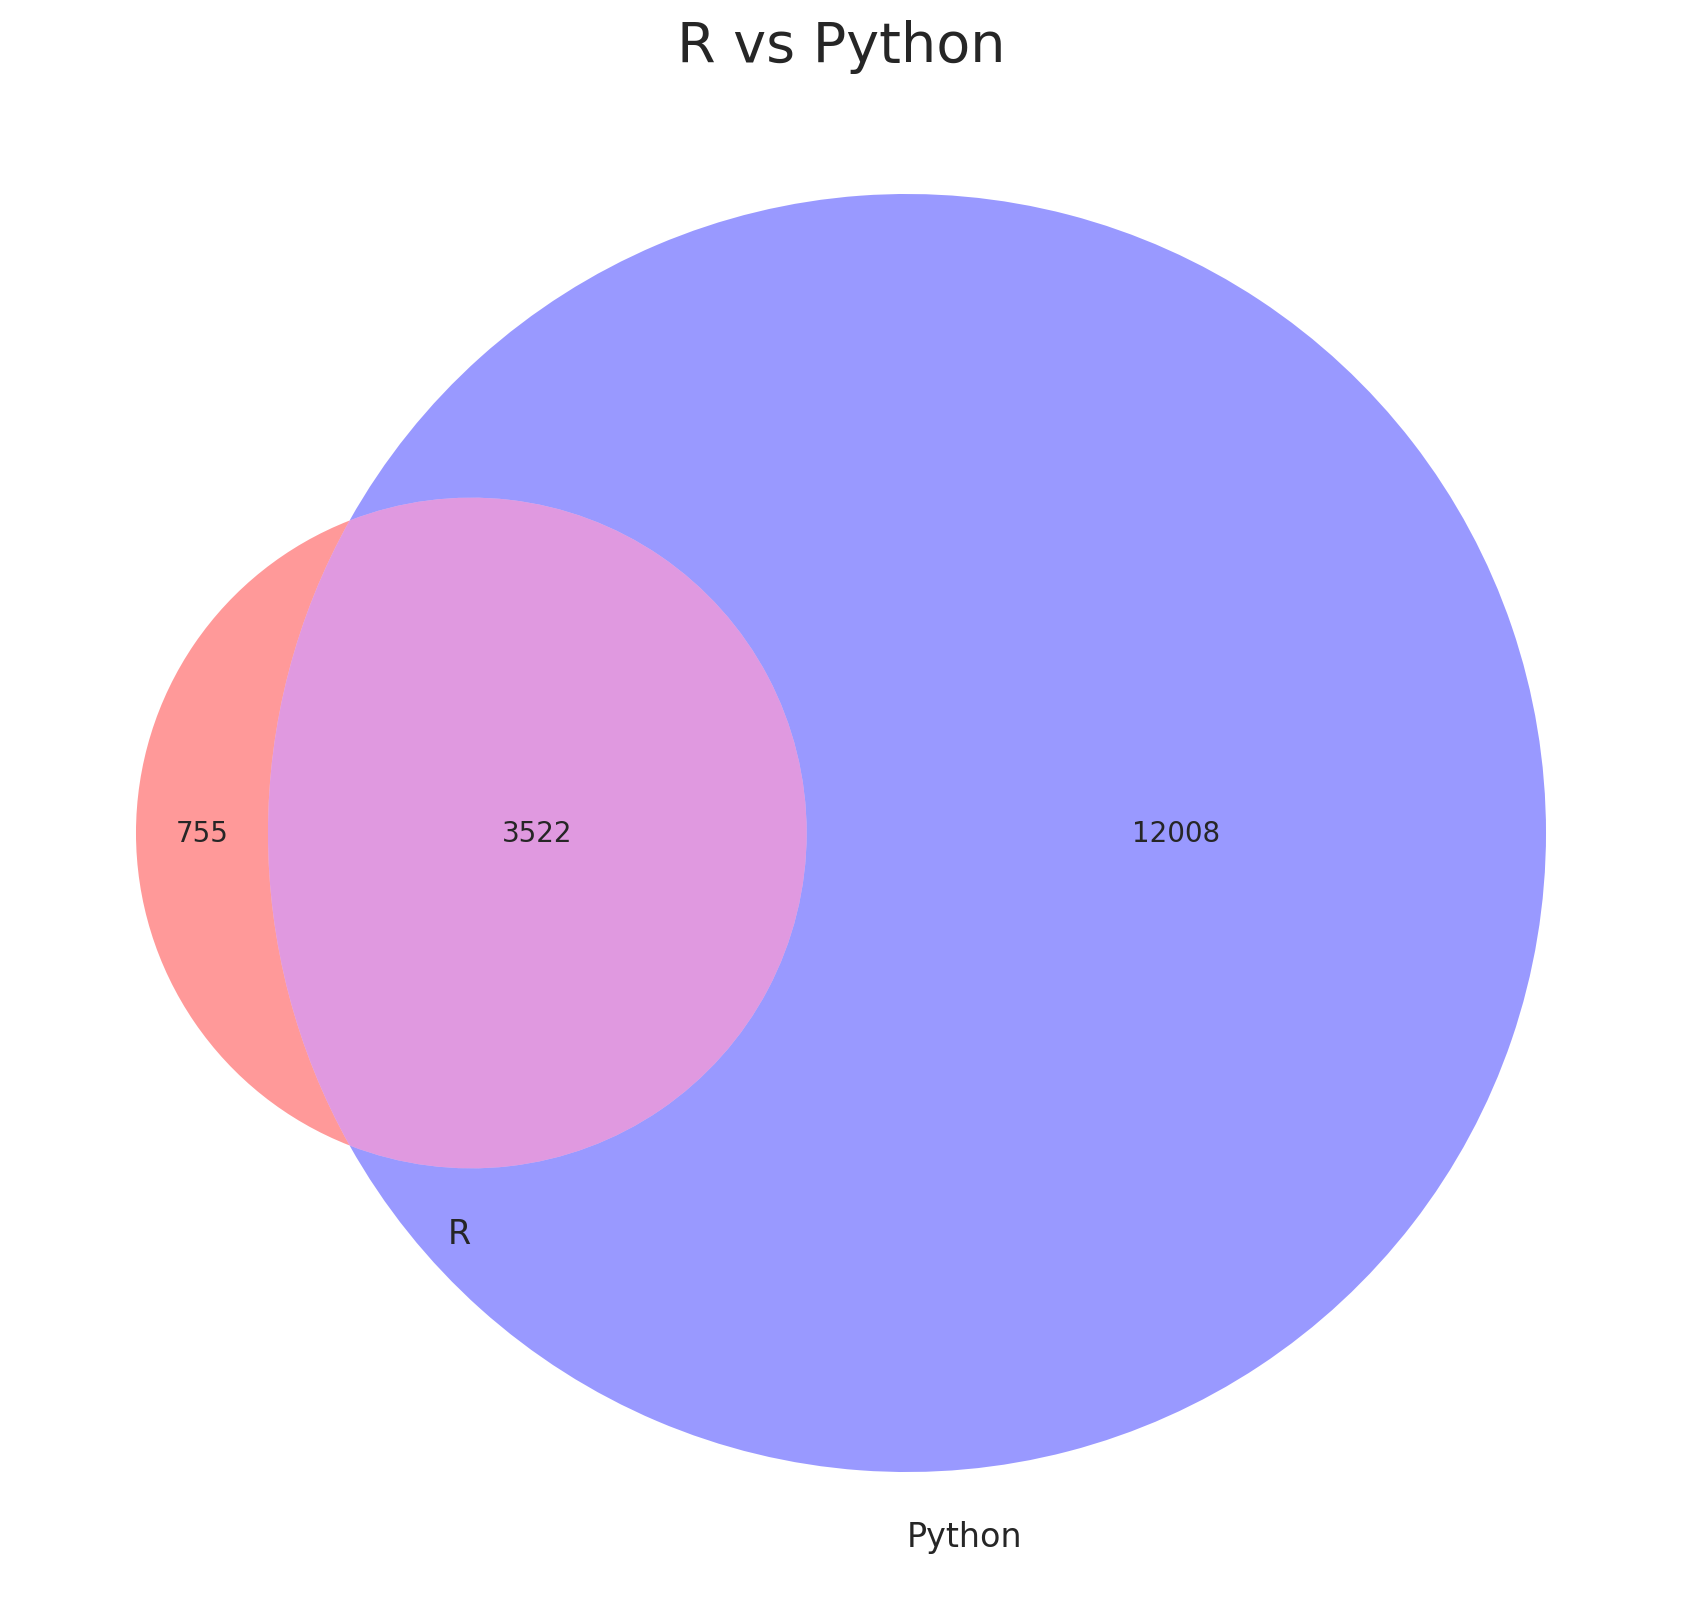

In [10]:
#R_20 dataframe will just have the data of respondents who only use R
R_20 = data_20[(data_20['Q7_Part_2']=='R')]
R_20 = R_20[(R_20['Q7_Part_1']!='Python')]

#P_20 dataframe will just have the data of respondents who only use Python
P_20 = data_20[(data_20['Q7_Part_1']=='Python')]
P_20 = P_20[(P_20['Q7_Part_2']!='R')]

#RP_20 dataframe will just have the data of respondents who use both Python and R, this dataframe does not contain the respondents who use a single
#language, if your familiar with Set theory this is just the , intersection of Python and R 
RP_20 = data_20[(data_20['Q7_Part_1']=='Python')]
RP_20 = RP_20[(RP_20['Q7_Part_2']=='R')]

#These Dataframes are going to be used again in 2.5, so make sure to remember them 

plt.figure(figsize=(15,10))
#For this we had imported the matplotlib_venn as vplt beforehand, in subsets you input first vairable's count in '10' , second variable's count in '01'
#, and in '11', you input the intersection of both the variable's
v = vplt.venn2(subsets={'10':R_20.shape[0],'01':P_20.shape[0],'11':RP_20.shape[0]},set_labels = ('R','Python'),set_colors=['Red','Blue'])
ax= plt.gca()
plt.title('R vs Python',size=20)

Now, i am going to see which notebook do R users, Python users, and users who use both R and Python Prefer
Although, a sad thing is that individuals using only R are very less, just 755 people, still lets go on with our analysis

Text(0.5, 0.98, 'Language vs Hosted Notebook')

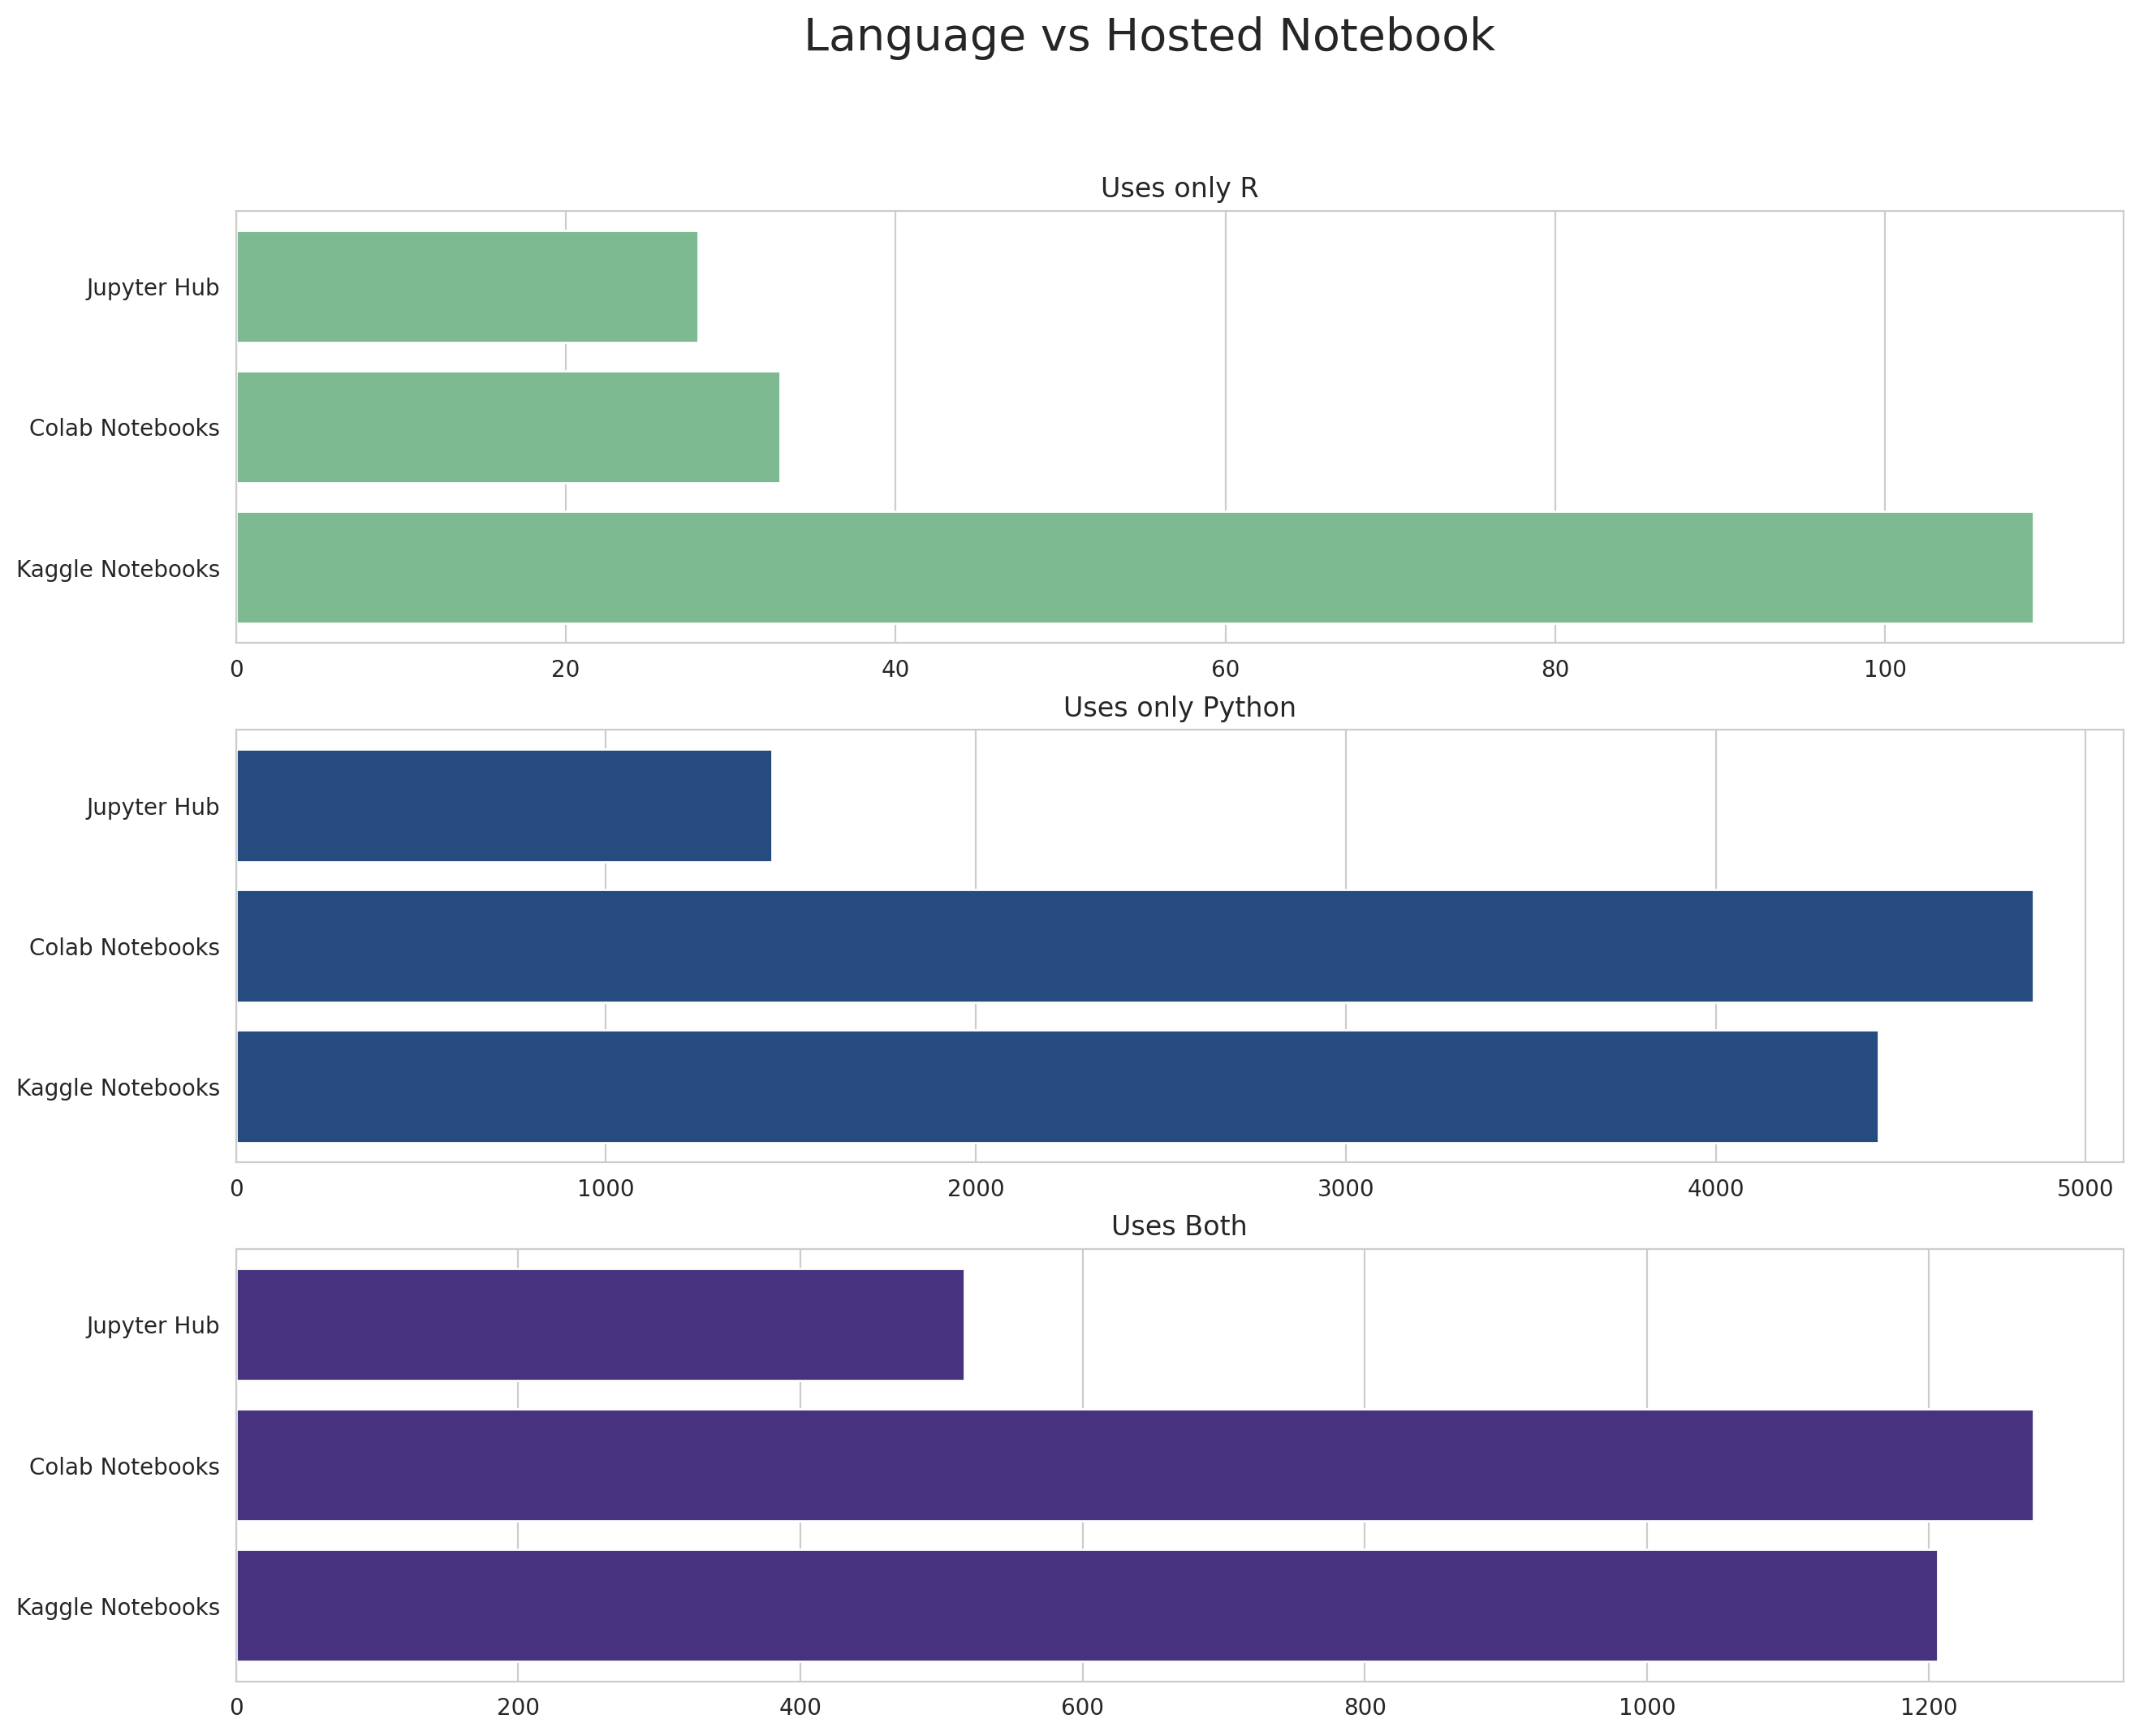

In [11]:
plt.figure(figsize=(15,12))
sns.set_palette('crest')

#The first subplot
plt.subplot(3,1,1)



#R_20 dataframe 
#Using Notebook to plot xticklabels
#Using boolean graph to extract the information we need from the dataframe and then appending it in the Notebook_values list
Notebook= ['Kaggle Notebooks','Colab Notebooks','Jupyter Hub']
Notebook_values = []
Notebook_values.append(R_20[R_20['Q10_Part_1']==' Kaggle Notebooks']['Q10_Part_1'].count())
Notebook_values.append(R_20[R_20['Q10_Part_2']=='Colab Notebooks']['Q10_Part_2'].count())
Notebook_values.append(R_20[R_20['Q10_Part_5']==' Binder / JupyterHub ']['Q10_Part_5'].count())

#Plotting the bar graph
plt.barh(Notebook,Notebook_values)
ax = plt.gca()
ax.yaxis.grid(False)
plt.title('Uses only R')
sns.set_palette('crest_r')

#The second subplot
plt.subplot(3,1,2)


#P_20
#Using Notebook to plot xticklabels
#Using boolean graph to extract the information we need from the dataframe and then appending it in the Notebook_values list
Notebook = ['Kaggle Notebooks','Colab Notebooks','Jupyter Hub']
Notebook_values = []
Notebook_values.append(P_20[P_20['Q10_Part_1']==' Kaggle Notebooks']['Q10_Part_1'].count())
Notebook_values.append(P_20[P_20['Q10_Part_2']=='Colab Notebooks']['Q10_Part_2'].count())
Notebook_values.append(P_20[P_20['Q10_Part_5']==' Binder / JupyterHub ']['Q10_Part_5'].count())

#Plotting the bargraph
plt.barh(Notebook,Notebook_values)
ax = plt.gca()
ax.yaxis.grid(False)
plt.title('Uses only Python')

sns.set_palette('viridis')

#Third subplot
plt.subplot(3,1,3)


#RP_20
#Using Notebook to plot xticklabels
#Using boolean graph to extract the information we need from the dataframe and then appending it in the Notebook_values list
Notebook = ['Kaggle Notebooks','Colab Notebooks','Jupyter Hub']
Notebook_values = []
Notebook_values.append(RP_20[RP_20['Q10_Part_1']==' Kaggle Notebooks']['Q10_Part_1'].count())
Notebook_values.append(RP_20[RP_20['Q10_Part_2']=='Colab Notebooks']['Q10_Part_2'].count())
Notebook_values.append(RP_20[RP_20['Q10_Part_5']==' Binder / JupyterHub ']['Q10_Part_5'].count())

#Plotting the bar graph
plt.barh(Notebook,Notebook_values)
ax = plt.gca()
ax.yaxis.grid(False)
plt.title('Uses Both')


plt.suptitle('Language vs Hosted Notebook',size=20)

Aha, Just as I had suspected, For those of you who don't understand as to why Kaggle seems to be doing so much better than Colab in case of R users, it is because Colab unlike Kaggle does not support R language, supports only Python and Swift 
This time Kaggle got the Hurray (The only one yet), although that Hurray is short lived since Collab again comes on top, in case of people who either only use Python or who use both the Languages, That too decisively (the difference between the two is not that low)
<img src="https://i.imgflip.com/4ogzhp.jpg" />

#  2. Favourite Media source to learn about macine learning

# 2.1 Popularity

Text(0.5, 1.0, 'Platform used to publicly share or deploy data analysis or machine learning applications')

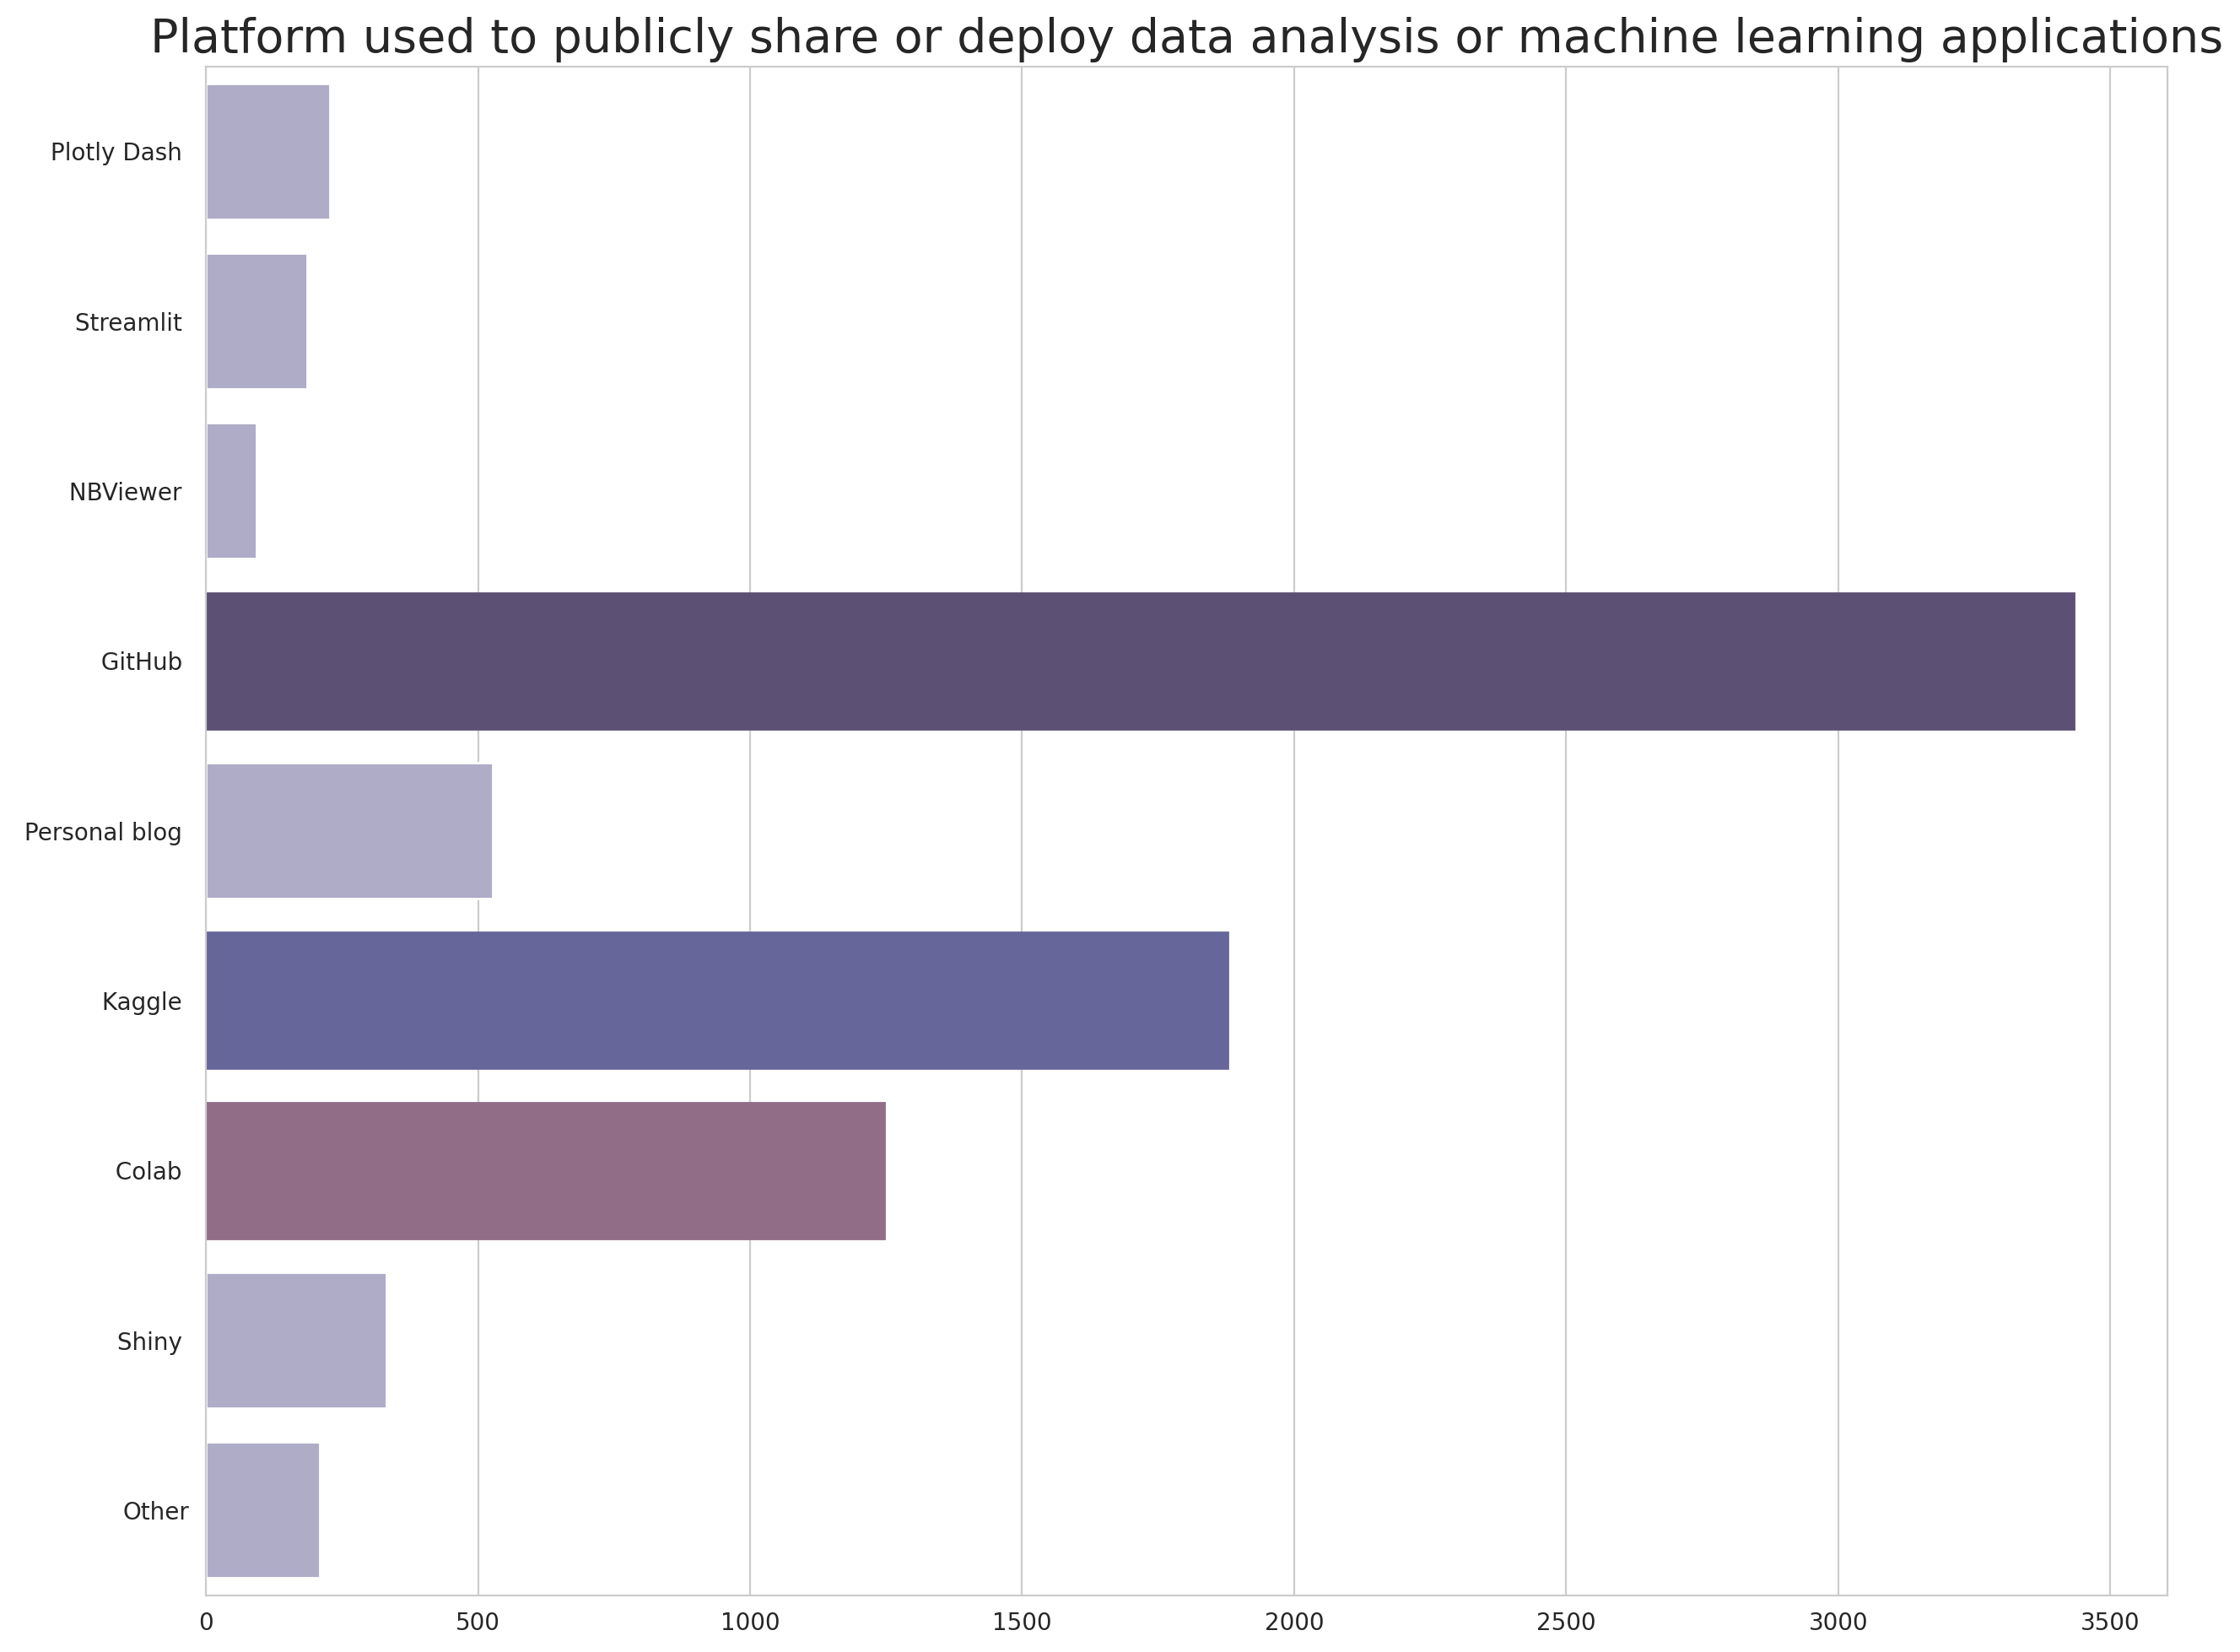

In [12]:
#Creating an empty list to store the name of the Platforms and number of respondents who use it
Platform = []
Platform_values = []


#We are iterating over the for loop and entering appropriate values in the empty list
#using string concatenation to get Column names like 'Q10_Part_ + str(1)'='Q10_Part_1'
for x in range(1,9):
    Platform.append(data_20['Q36_Part_'+str(x)].dropna().unique()[0])
Platform.append(data_20['Q36_OTHER'].dropna().unique()[0])


for y in range(1,9):
    Platform_values.append(data_20['Q36_Part_'+str(y)].dropna().count())
Platform_values.append(data_20['Q36_OTHER'].dropna().count())
                     

plt.figure(figsize=(15,12))
sns.set_style('whitegrid')

#Plotting the graph, using seaborn to plot the bar graph using sns.barplot 
sns.barplot(x=Platform_values,y=Platform,data=data_20,color='#aaa7cc')
ax=plt.gca()

#We are accessing the axis using plt.gca() and storing it in the axis funtion, then getting the bars, children
#of the axis object via .get_children() and setting the color of the individual bar via .set_color()
ax.get_children()[3].set_color('#5C5174')
ax.get_children()[5].set_color('#66669a')
ax.get_children()[6].set_color('#926d88')
plt.title('Platform used to publicly share or deploy data analysis or machine learning applications',size=20)

Obviously, Github is at first place given how it is the one stop destination to store and share your code,
It seems that this time Kaggle has the upper hand , while the other brother, colab seems to be in 3rd place, although it is not very behind, Also both the brothers seem to be doing be doing much better than all the other platforms (Excluding Github)

Now,
Github is the place where you store all of your code, irrespective of wether it is data science related or not, while Colab and Kaggle can be considered a bit Data Science Centric. 
Lets do an analysis with respect to how long an individual has been using machine learning methods

# 2.2 Usage by Machine Learners
Now,
Github is the place where you store all of your code, irrespective of wether it is data science related or not, while Colab and Kaggle can be considered a bit Data Science Centric. 
Lets do an analysis with respect to how long an individual has been using machine learning methods

Text(0.5, 0.98, 'Platform Prefered vs Machine learning Experience')

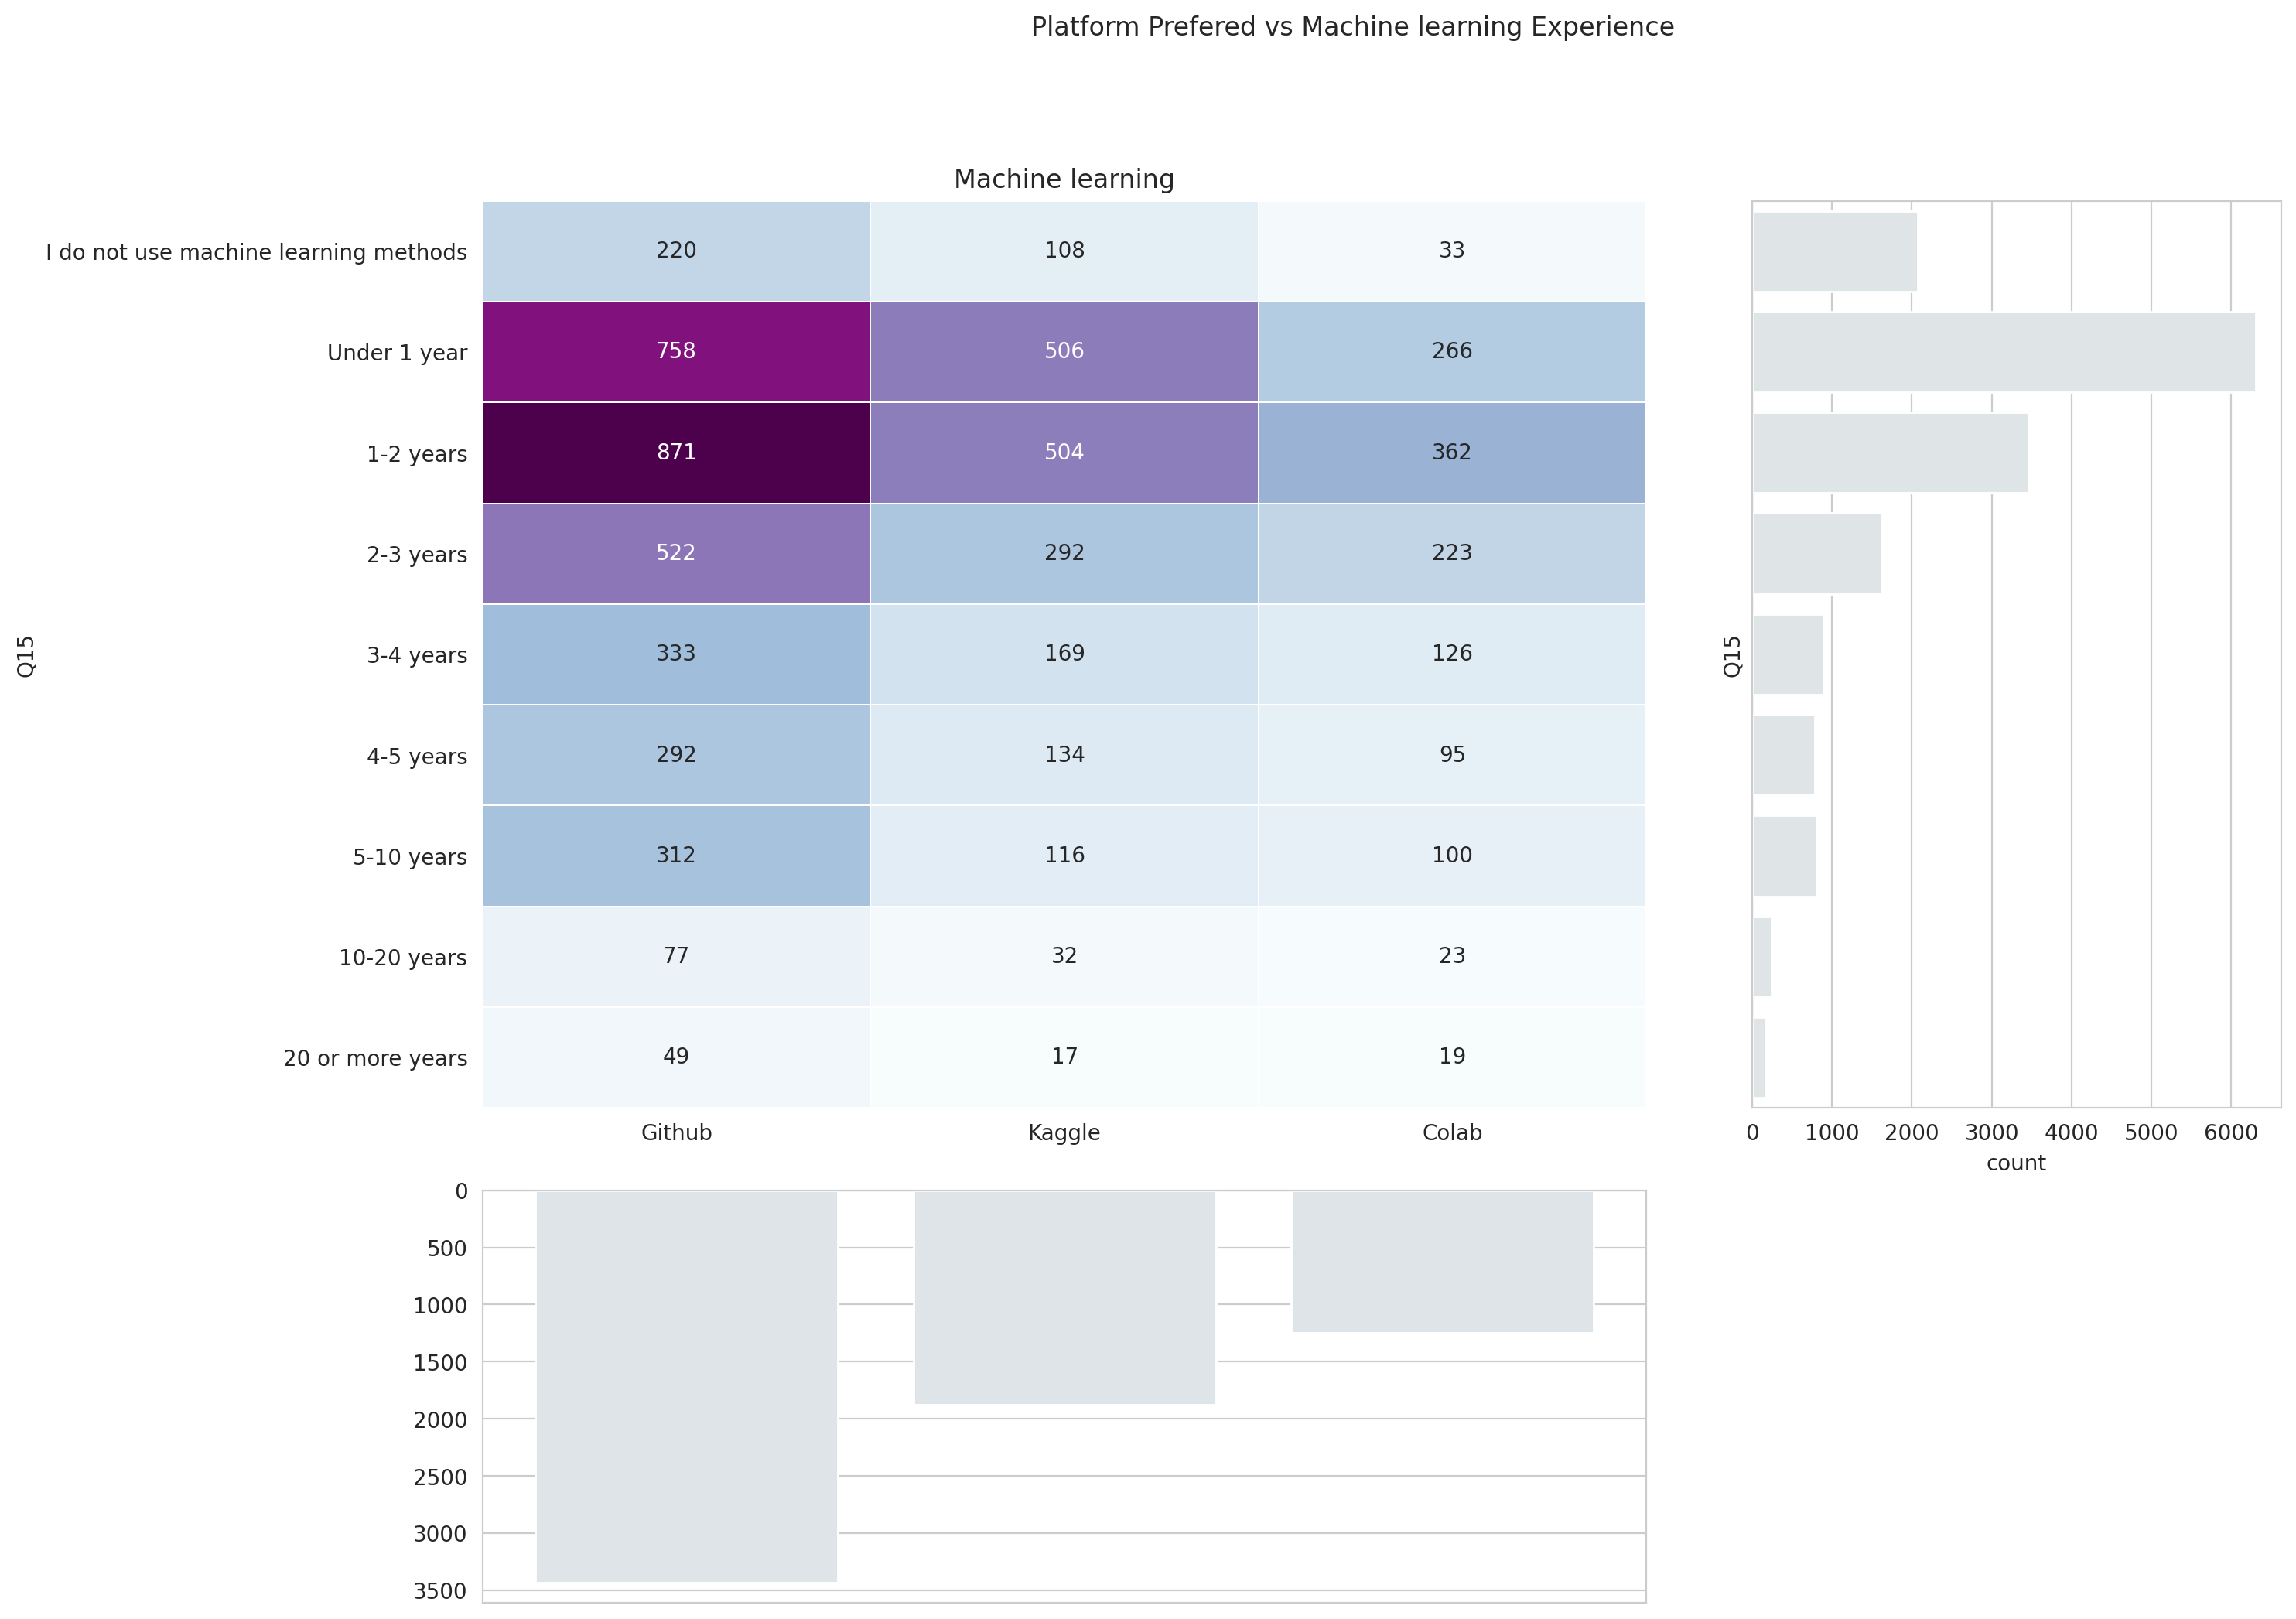

In [13]:
#We are using Gridspec to create the subplots
gspec = gridspec.GridSpec(3, 3)
plt.figure(figsize=(15,12))

#Plotting the first Subplot
plt.subplot(gspec[0:2,0:2])

#Here we are first creating a pivot table with the following columns = ["Q15",'Q36_Part_4','Q36_Part_6','Q10_Part_7'] and then grouping them w.r.t 'Q15'
#After this, we are creating a new dataframe using the pivot table, which contains the Platforms name, and their counts in the columns w.r.t the 
#people who apply machine learning code 
pivot = data_20[["Q15",'Q36_Part_4','Q36_Part_6','Q36_Part_7']].groupby("Q15")
new_data = pivot['Q36_Part_4'].count()
new_data = pd.DataFrame(new_data)
new_data.rename(columns = {'Q36_Part_4' : 'Github'},inplace=True)
new_data['Kaggle'] = pivot['Q36_Part_6'].count()
new_data['Colab'] = pivot['Q36_Part_7'].count()
row_index = [7,8,0,2,4,5,6,1,3]
new_data = new_data.iloc[row_index]

#now we are creating the heatmap, note that cbar=False removes the color bar, and annot=True will show the values on the of the heatmaps tiles, also
#fmt='d' enures that the annotation's are in integer format
sns.heatmap(new_data,linewidth=0.3,cbar=False,annot =True,fmt='d',cmap='BuPu')
plt.title('Machine learning')

#Plotting the second Subplot
plt.subplot(gspec[0:2,2])

#Creating the countplot via seaborn, 
sns.countplot(y='Q15',data=data_20,order=['I do not use machine learning methods', 'Under 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-10 years',  '10-20 years', '20 or more years'],color='#DEE4E7')
ax=plt.gca()
plt.tick_params(labelleft=False)


#Creating an empty list to store the name of the platforms and number of respondents who use it
Platform = []
Platform_values = []

#Appending the names of the platforms and the values of the platforms usage for deploying code
Platform.append(data_20['Q36_Part_4'].dropna().unique()[0])
Platform.append(data_20['Q36_Part_6'].dropna().unique()[0])
Platform.append(data_20['Q36_Part_7'].dropna().unique()[0])

Platform_values.append(data_20['Q36_Part_4'].dropna().count())
Platform_values.append(data_20['Q36_Part_6'].dropna().count())
Platform_values.append(data_20['Q36_Part_7'].dropna().count())

#Plotting the third subplot
plt.subplot(gspec[2,0:2])

#Plotting the bar graph
plt.bar(x=Platform,height=Platform_values,color='#DEE4E7')
ax=plt.gca()
ax.xaxis.grid(False)
ax.tick_params(labelbottom=False)

#To reverse the bar graph
plt.ylim(reversed(plt.ylim()))
plt.suptitle('Platform Prefered vs Machine learning Experience')

It seems that even when it comes to people who use Machine learning Methods, People use github more than Kaggle and Colab, even though kaggle and colab were specifically made to store machine learning applications, also The trend of Kaggle being more prefered than Colab seems to continues

# 2.3 Use by People who are in the Data science field
So, lets do an analysis with just data scientists, data analysts, etc., leaving those people who are not on the great journey of Data Science.
Will the trend still be the same, having Github at the top, and Kaggle being better than Colab

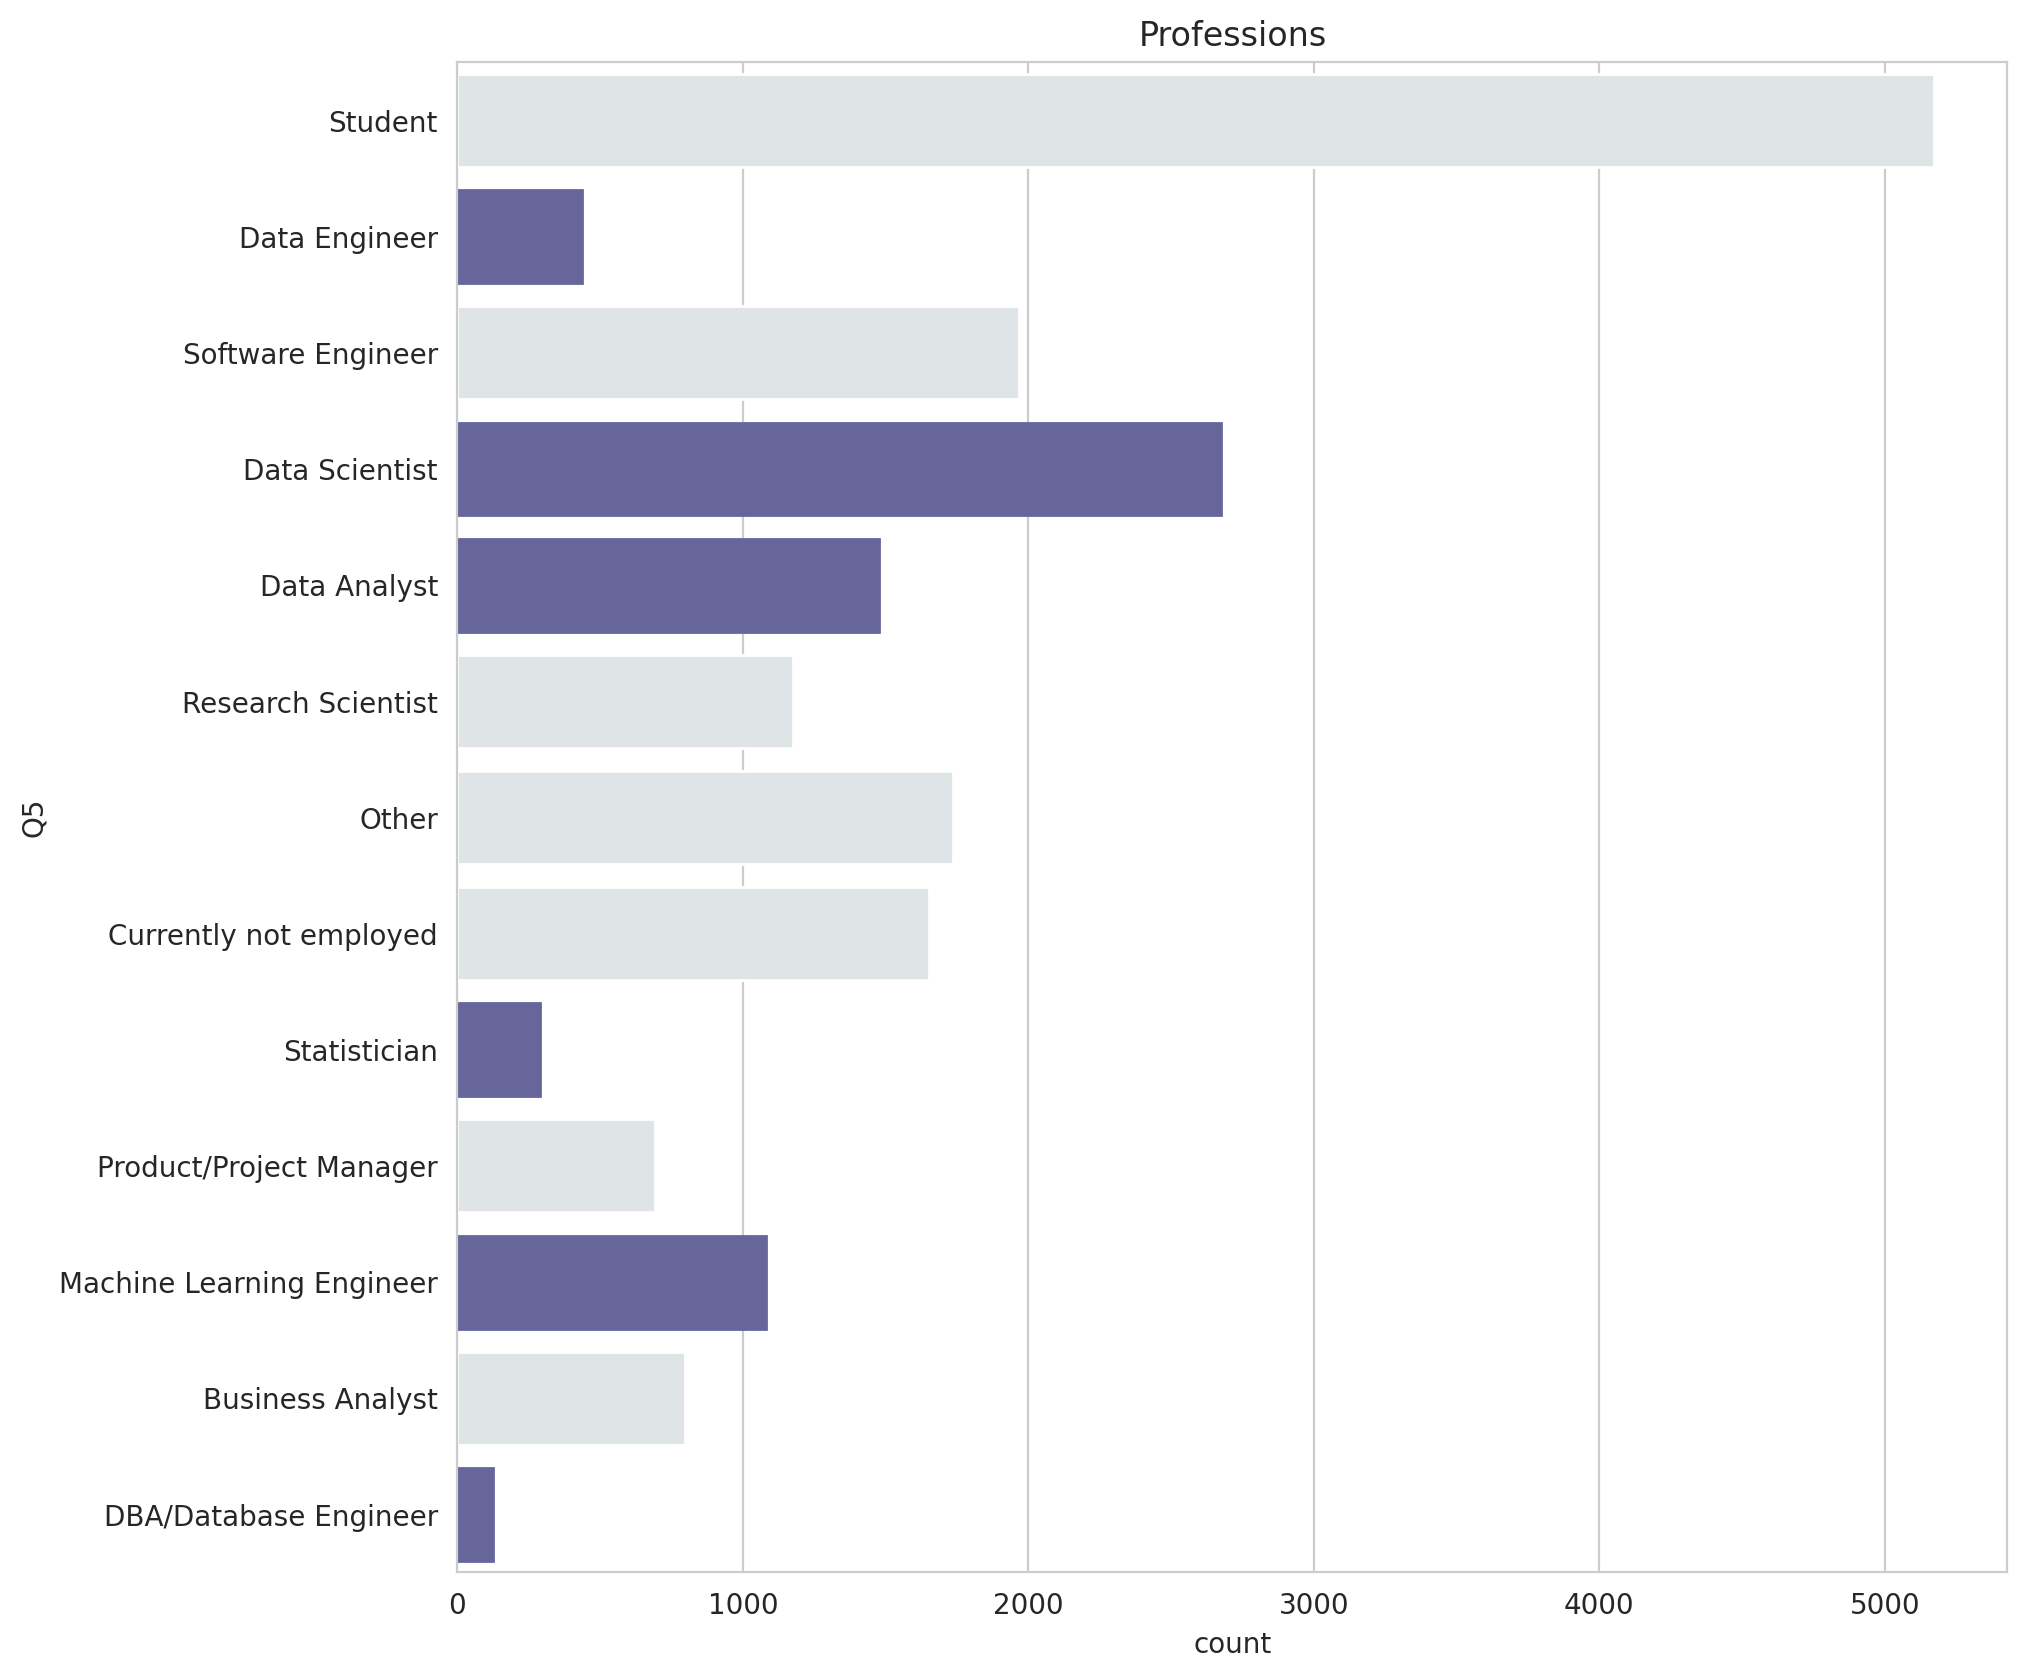

In [14]:
plt.figure(figsize=(10,10))

#Plotting the countplot in the seaborn package
sns.countplot(y='Q5',data=data_20,color='#DEE4E7')
ax=plt.gca()
plt.title('Professions')

#Accessing the bars that we are going to use in the People in Data Science Field vs Platform used via axes's get_children() function and set color by
#set_color() function.
ax.get_children()[1].set_color('#66669a')
ax.get_children()[3].set_color('#66669a')
ax.get_children()[4].set_color('#66669a')
ax.get_children()[8].set_color('#66669a')
ax.get_children()[10].set_color('#66669a')
ax.get_children()[12].set_color('#66669a')

In this above graph we can see all the occupations, For our further analysis of people in the field of Data Science, We will only consider the follow professions as Data Science Centric, namely
Data Engineer / Data Scientist / Data Analyst / Statician / Machine Learning Engineer / Database Engineer
Even though some of the Students, Currently Employed might be learning about Data Science, But they are not in a job in the field of Data science so we will not be considering them
Project Manager, Buisness Analyst, Research Scientist, Software Engineer, Other are too vague terms to consider a part of Data Science, as it might have had confused some of the respondents.

Text(0.5, 0.98, 'Platform Prefered vs Language')

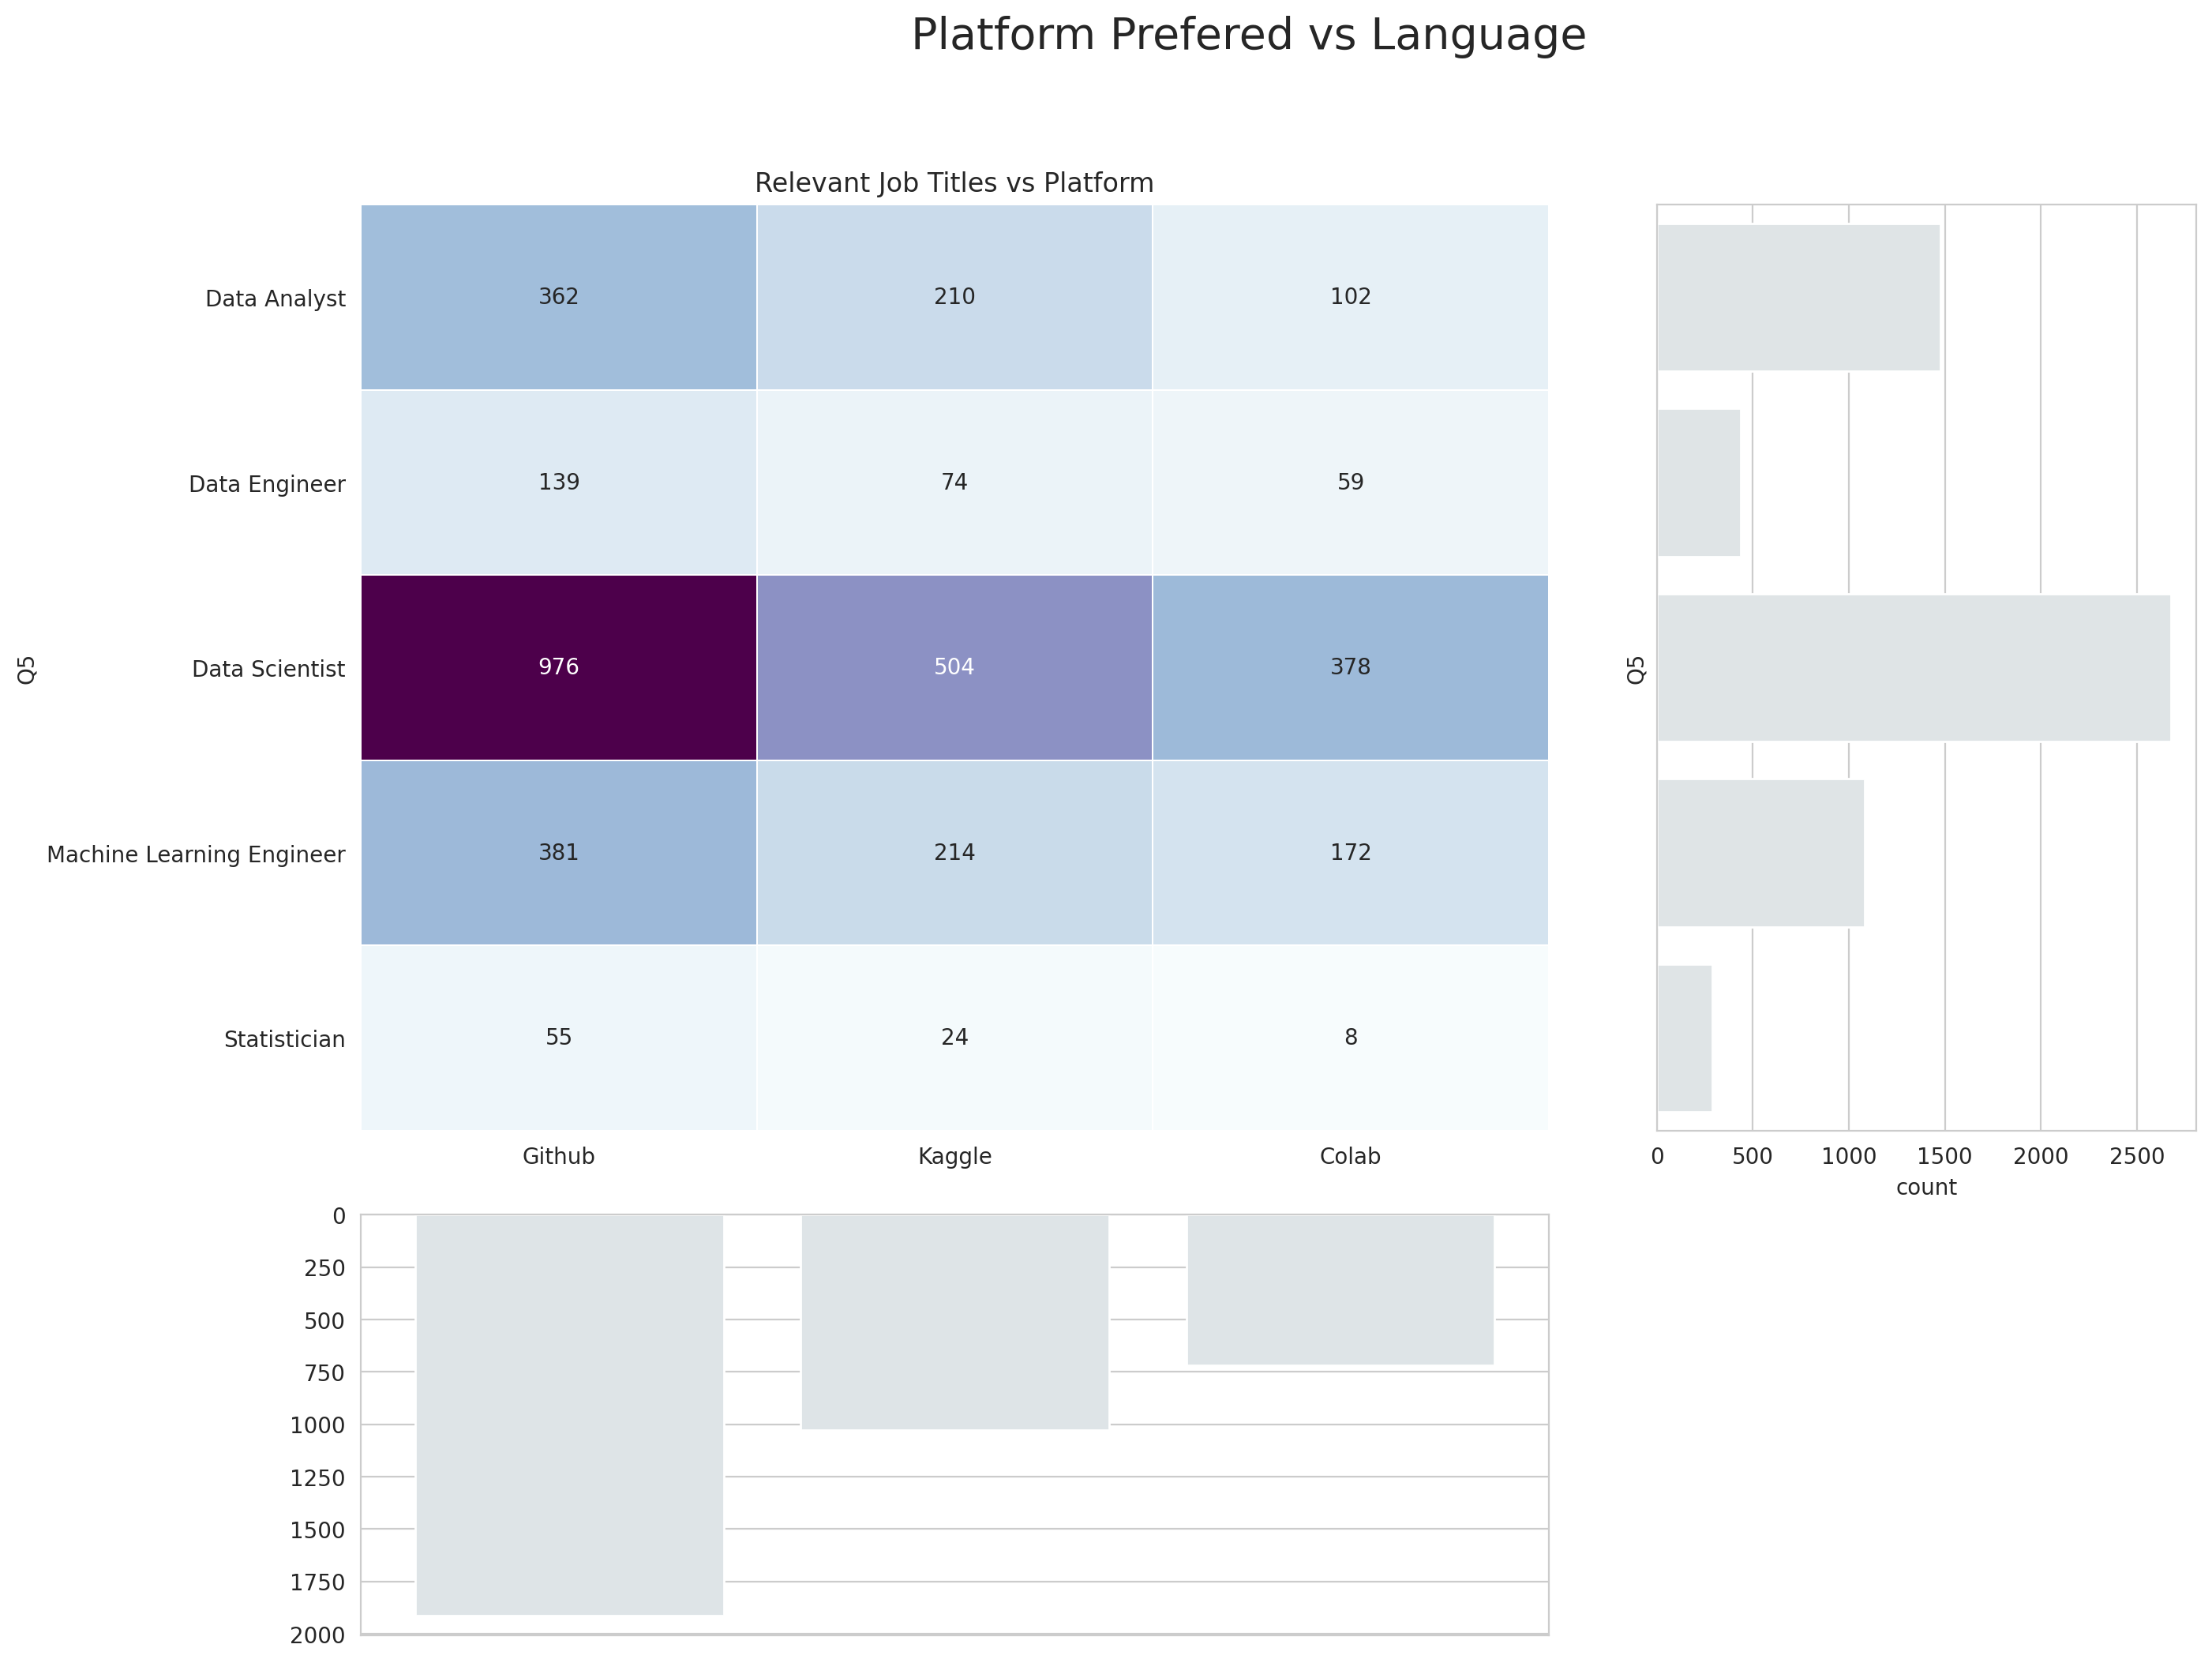

In [15]:
#We are using Gridspec for the creation of the subplots
gspec = gridspec.GridSpec(3, 3)
plt.figure(figsize=(15,12))
plt.subplot(gspec[0:2,0:2])


#Creating a new dataset just containing the relevant job positions
New_data = data_20[(data_20['Q5']=='Data Engineer')|(data_20['Q5']=='Data Scientist')|(data_20['Q5']=='Data Analyst')|(data_20['Q5']=='Statistician')|(data_20['Q5']=='Database Engineer')|(data_20['Q5']=='Data Engineer')|(data_20['Q5']=='Machine Learning Engineer')]

#Then, we are first creating a pivot table with the following columns = ["Q5",'Q36_Part_4','Q36_Part_6','Q10_Part_7'] and then grouping them w.r.t 'Q5'
#After this, we are creating a new dataframe using the pivot table, which contains the Platforms name, and their counts in the columns w.r.t the 
#people in the field of the Data Science
pivot = New_data[["Q5",'Q36_Part_4','Q36_Part_6','Q36_Part_7']].groupby("Q5")
new_data = pivot['Q36_Part_4'].count()
new_data = pd.DataFrame(new_data)
new_data.rename(columns = {'Q36_Part_4' : 'Github'},inplace=True)
new_data['Kaggle'] = pivot['Q36_Part_6'].count()
new_data['Colab'] = pivot['Q36_Part_7'].count()

#Now we are creating the heatmap, note that cbar=False removes the color bar, and annot=True will show the values on the of the heatmaps tiles, also
#fmt='d' enures that the annotation's are in integer format
sns.heatmap(new_data,linewidth=0.3,cbar=False,annot =True,fmt='d',cmap='BuPu')
plt.title('Relevant Job Titles vs Platform')

#Plotting the second subplot
plt.subplot(gspec[0:2,2])

#Creating the countplot via seaborn, 
sns.countplot(y='Q5',data=New_data,order=['Data Analyst', 'Data Engineer', 'Data Scientist', 'Machine Learning Engineer', 'Statistician'],color='#DEE4E7')
plt.tick_params(labelleft=False)

#Creating an empty list to store the name of the platforms and number of respondents who use it
Platform_x = []
Platform_x_values = []

#Appending the names of the platforms and the values of the platforms usage for deploying code
Platform_x.append(New_data['Q36_Part_4'].dropna().unique()[0])
Platform_x.append(New_data['Q36_Part_6'].dropna().unique()[0])
Platform_x.append(New_data['Q36_Part_7'].dropna().unique()[0])

Platform_x_values.append(New_data['Q36_Part_4'].dropna().count())
Platform_x_values.append(New_data['Q36_Part_6'].dropna().count())
Platform_x_values.append(New_data['Q36_Part_7'].dropna().count())

#Plotting the third subplot 
plt.subplot(gspec[2,0:2])
plt.bar(x=Platform_x,height=Platform_x_values,color='#DEE4E7')
ax=plt.gca()
ax.xaxis.grid(False)
ax.tick_params(labelbottom=False)

#To reverse the bar graph
plt.ylim(reversed(plt.ylim()))
plt.suptitle('Platform Prefered vs Language',size=20)

The same trend continues, Github is at lead with every individual of a specific occupation, It seems that when it comes to deploying even Machine Learning code and Exploratory Data Analysis codes, Github is the one most prefered, 
Similarly, Kaggle also is doing better than Colab with people who are in the Data Science Field.

I was trying to find if there would have had been some change in the trend, considering both Colab and Kaggle as pro Data Science, but it seem people of Data Science use Github for all their storing and deploying purposes, Although this is not that suprising that Github is the Holyland for people to share and deploy code, and organize works between team members.

# 2.4 Language Friendly
Once again, I am only considering Python and R, given how they are the most popular languages in which you can build machine learning applications.

Text(0.5, 0.98, 'Language vs Platform Users')

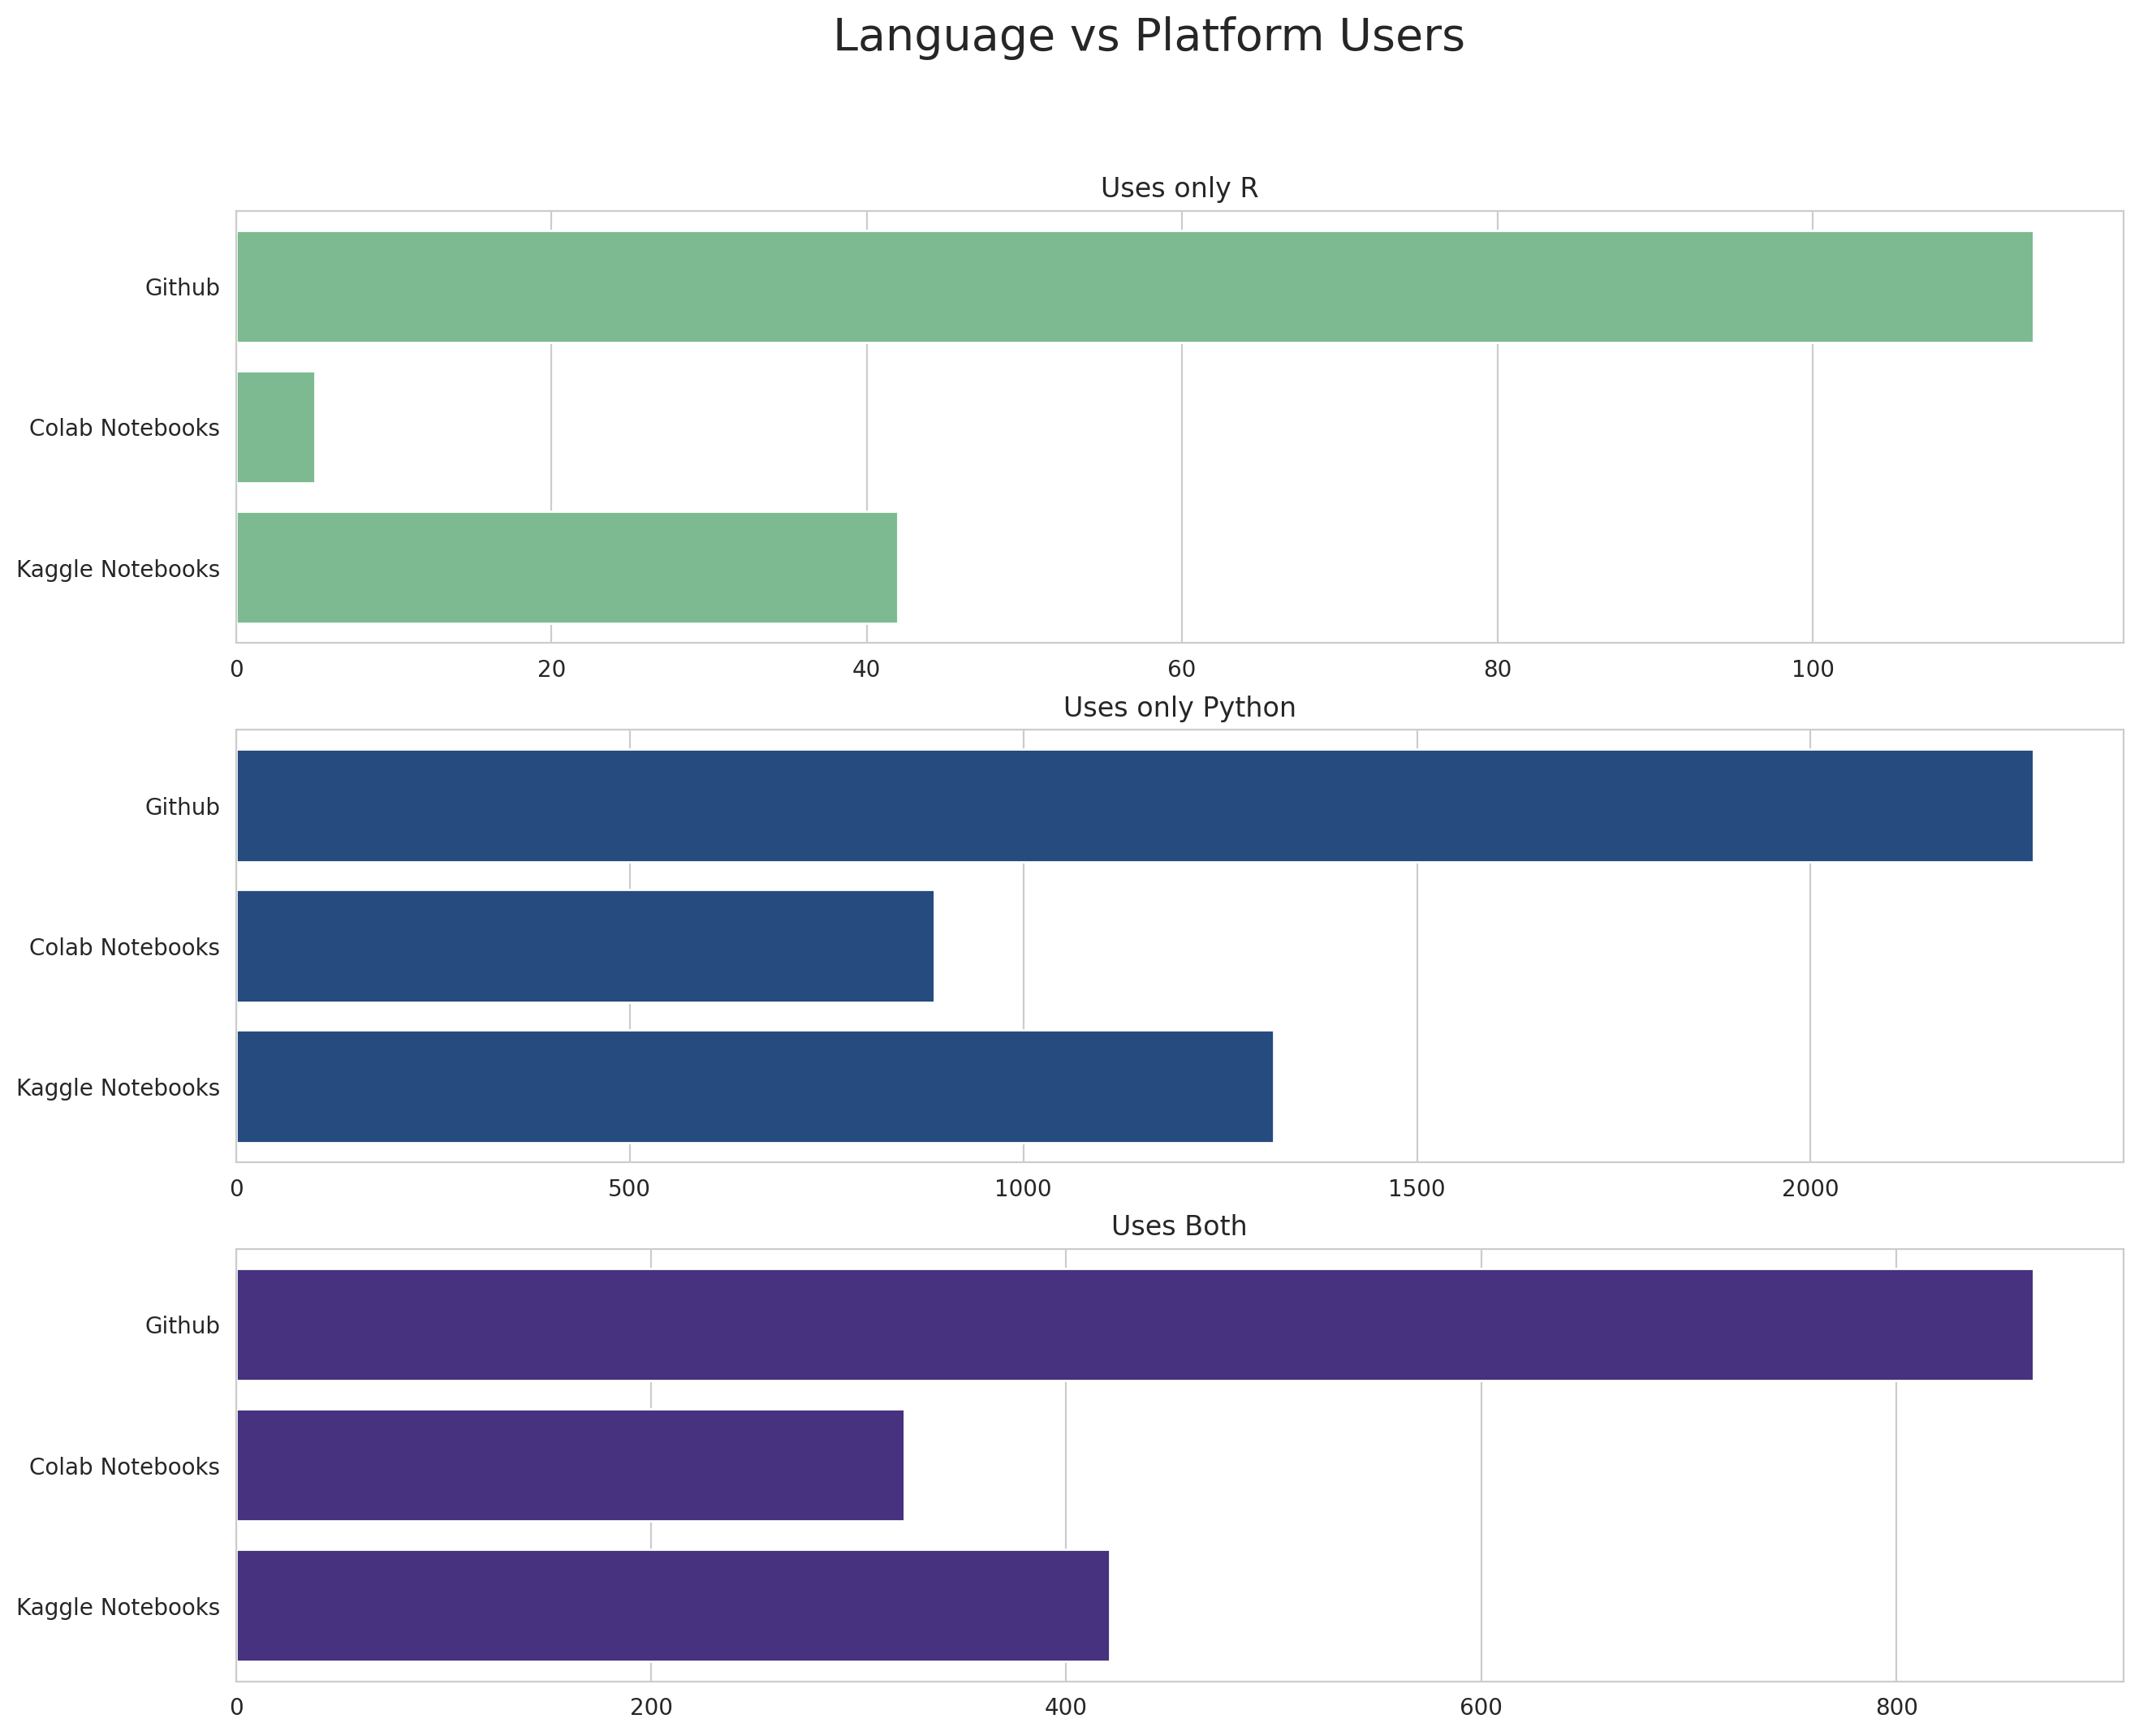

In [16]:
#In Section 1.6, We have already created the following Dataframes

#R_20 dataframe will just have the data of respondents who only use R
#P_20 dataframe will just have the data of respondents who only use Python
#RP_20 dataframe will just have the data of respondents who use both Python and R, this dataframe does not contain the respondents who use a single
#language, if your familiar with Set theory this is just the , intersection of Python and R 

#To understand how I created the following Dataframes please refer to that notebook.

plt.figure(figsize=(15,12))
sns.set_palette('crest')

#The first subplot
plt.subplot(3,1,1)



#R_20 dataframe 
#Using Platform to plot xticklabels
#Using boolean graph to extract the information we need from the dataframe and then appending it in the Notebook_values list
Platform= ['Kaggle Notebooks','Colab Notebooks','Github']
Platform_values = []
Platform_values.append(R_20['Q36_Part_6'].dropna().count())
Platform_values.append(R_20['Q36_Part_7'].dropna().count())
Platform_values.append(R_20['Q36_Part_4'].dropna().count())

#Plotting the bar graph
plt.barh(Platform,Platform_values)
ax = plt.gca()
ax.yaxis.grid(False)
plt.title('Uses only R')
sns.set_palette('crest_r')

#The second subplot
plt.subplot(3,1,2)


#P_20
#Using Notebook to plot xticklabels
#Using boolean graph to extract the information we need from the dataframe and then appending it in the Notebook_values list
Platform= ['Kaggle Notebooks','Colab Notebooks','Github']
Platform_values = []
Platform_values.append(P_20['Q36_Part_6'].dropna().count())
Platform_values.append(P_20['Q36_Part_7'].dropna().count())
Platform_values.append(P_20['Q36_Part_4'].dropna().count())

#Plotting the bargraph
plt.barh(Platform,Platform_values)
ax = plt.gca()
ax.yaxis.grid(False)
plt.title('Uses only Python')

sns.set_palette('viridis')

#Third subplot
plt.subplot(3,1,3)


#RP_20
#Using Notebook to plot xticklabels
#Using boolean graph to extract the information we need from the dataframe and then appending it in the Notebook_values list
Platform= ['Kaggle Notebooks','Colab Notebooks','Github']
Platform_values = []
Platform_values.append(RP_20['Q36_Part_6'].dropna().count())
Platform_values.append(RP_20['Q36_Part_7'].dropna().count())
Platform_values.append(RP_20['Q36_Part_4'].dropna().count())

#Plotting the bar graph
plt.barh(Platform,Platform_values)
ax = plt.gca()
ax.yaxis.grid(False)
plt.title('Uses Both')


plt.suptitle('Language vs Platform Users',size=20)

OK, So it seems that Github is undeniably the king among all the other Platforms, no one can even compares to it, given the magnificent numbers it's projecting.

Now, leaving Github aside.
The Trend is still the same as before, Colab behind of Kaggle, while the gap is not so great between the two when it comes to people who use Pyhton only or who use both the languages, Colab is left behind significantly
by Kaggle when it comes to R users. Obviously, the reason for this is as Colab only supports Python and Swift,
not R.

It seems that for R users Kaggle is the place to go, not only in the case of Hosted Notebooks, but also when they want to deploy and share their data analysis and machine learning codes. 

# 2.5 Usage of the Platform w.r.t Other Platforms


Text(0.9, 0.0, 'Kaggle, Colab and Github:608')

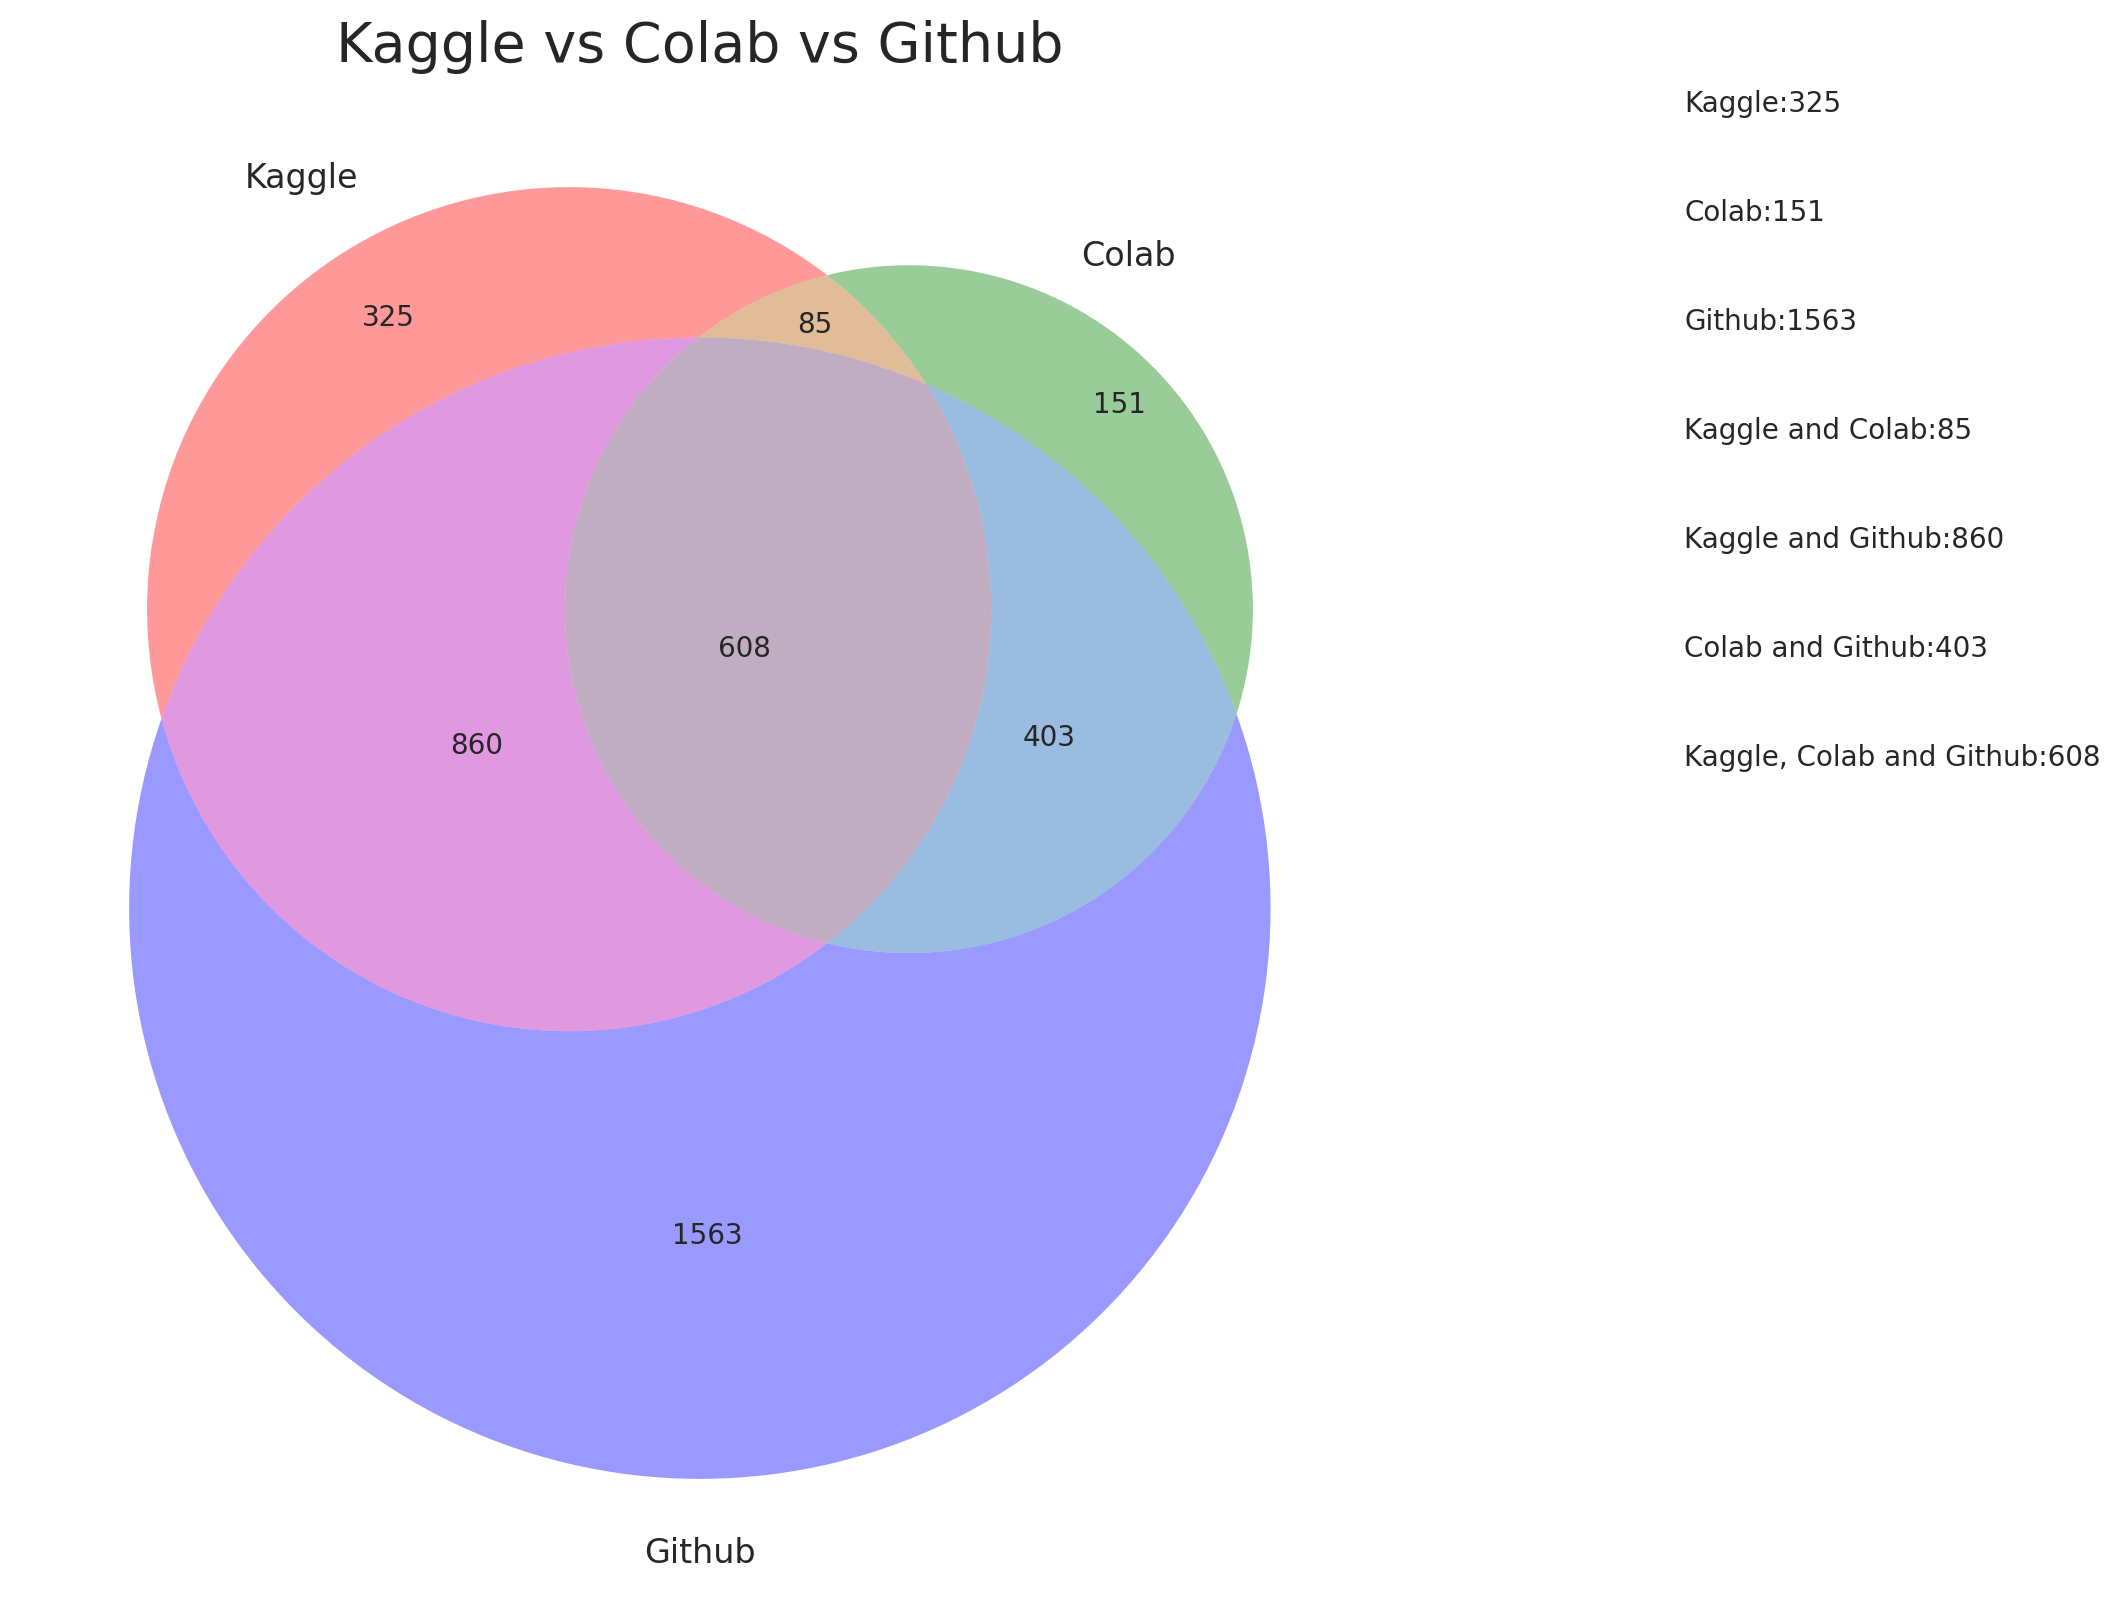

In [17]:
#Dataframes that will be used to create the Dataframes we require
Kaggle_20 = data_20[(data_20['Q36_Part_6']==' Kaggle ')]
Colab_20 = data_20[(data_20['Q36_Part_7']==' Colab ')]
Github_20 = data_20[(data_20['Q36_Part_4']==' GitHub ')]

#K_20 dataframe will just have the data of respondents who use just Kaggle Platform
K_20 = Kaggle_20[(Kaggle_20['Q36_Part_7']!=' Colab ')]
K_20 = K_20[(K_20['Q36_Part_4']!=' GitHub ')]

#C_20 dataframe will just have the data of respondents who use just Colab Platform
C_20 = Colab_20[(Colab_20['Q36_Part_6']!=' Kaggle ')]
C_20 = C_20[(C_20['Q36_Part_4']!=' GitHub ')]

#G_20 dataframe will just have the data of respondents who use just Github Platform
G_20 = Github_20[(Github_20['Q36_Part_6']!=' Kaggle ')]
G_20 = G_20[(G_20['Q36_Part_7']!=' Colab ')]
                 
#KC_20 dataframe will just have the data of respondents who use both Kaggle and Colab Platforms
KC_20 = Colab_20[(Colab_20['Q36_Part_6']==' Kaggle ')]
KC_20 = KC_20[(KC_20['Q36_Part_4']!=' GitHub ')]
                 
#GC_20 dataframe will just have the data of respondents who use both Github and Colab Platforms.
GC_20 = Github_20[(Github_20['Q36_Part_7']==' Colab ')]
GC_20 = GC_20[(GC_20['Q36_Part_6']!=' Kaggle ')]
                 
#GK_20 dataframe will just have the data of respondents who use both Github and Kaggle Platforms
GK_20 = Github_20[(Github_20['Q36_Part_6']==' Kaggle ')]
GK_20 = GK_20[(GK_20['Q36_Part_7']!=' Colab ')]

#GKC_20 datafram will just have the data of respondts who use all three platforms 
GKC_20 = Github_20[(Github_20['Q36_Part_6']==' Kaggle ')]
GKC_20 = GKC_20[(GKC_20['Q36_Part_7']==' Colab ')]

plt.figure(figsize=(15,10))
#For this we had imported the matplotlib_venn as vplt beforehand
v = vplt.venn3(subsets={'100':K_20.shape[0],'010':C_20.shape[0],'001':G_20.shape[0],'110':KC_20.shape[0],'101':GK_20.shape[0],'011':GC_20.shape[0],'111':GKC_20.shape[0]},set_labels = ('Kaggle','Colab','Github'))
ax= plt.gca()
plt.annotate
plt.title('Kaggle vs Colab vs Github',size=20)

ax.text(0.9, 0.6, "Kaggle:"+str(K_20.shape[0]), transform=ax.transData)
ax.text(0.9, 0.5, "Colab:"+str(C_20.shape[0]), transform=ax.transData)
ax.text(0.9, 0.4, "Github:"+str(G_20.shape[0]), transform=ax.transData)
ax.text(0.9, 0.3, "Kaggle and Colab:"+str(KC_20.shape[0]), transform=ax.transData)
ax.text(0.9, 0.2, "Kaggle and Github:"+str(GK_20.shape[0]), transform=ax.transData)
ax.text(0.9, 0.1, "Colab and Github:"+str(GC_20.shape[0]), transform=ax.transData)
ax.text(0.9, 0.0, "Kaggle, Colab and Github:"+str(GKC_20.shape[0]), transform=ax.transData)

OK, so it seems that a lot of people use only Github, While that is not the case for Kaggle and Colab, Kaggle and Colab is usually in conjecture with Github, people who just use Kaggle or Colab or just the two of them are very less. Perhaps it is because the employers usually look at github profiles to decide if they want to hire and individual or not, so most of the Kaggle and Colab users have to upload their codes on Github as well.

Also, more no. of people just use Kaggle than just Colab, Although the number difference between Kaggle and Colab is not much but, still Kaggle is the winner here.

# Summary and Key Insights


**1. Hosted Notebooks**
<ol>    
   <li>1.1 Popularity:-</li>
        Colab is the most popular hosted notebooks, Kaggle is at second very close to Colab, and very far behind from Kaggle and Colab is Binder/Jupyter Hub
        
   Verdict:- Colab wins this one, Colab is the most popular
    
   <li>1.2 Growth:-</li>
        Colab is once again the winner here, Colab has been rapidly growing the last three years, and has had a spike in popularity, and, thus wins this section as well.
        
   Verdict:- Colab has the most rapid growth rate, and might even become an the king decisively in the next few years
   
   <li>1.3 Usage by Coders:-</li>
        Colab is more beginner friendly than Kaggle, As Colab is much more popular with beginner coders than Kaggle, Although for people with coding experience less than 1 years, Kaggle is more popular, and in every other experience range, Kaggle and Colab are either equal, or Colab is slightly Better, this one goes to Colab as well
        
   Verdict:- Colab wins this one, It is more popular than its counterparts with the biggest range of coding experience
   
   <li>1.4 Usage by Machine Learners:-</li>
        Colab is more beginner friendly when it comes to writing Machine Learning Code, and wins by a very huge margin, and even in case of other experience levels, Colab has better results than Kaggle, the only exception is 3-5 years case, where kaggle is significantly better
        
   Verdict:- Colab wins this one, It seems that when it comes to writing Machine Learning Code Colab is very beginner friendly, more than its competitors
   
   <li>1.5 Popularity with Age groups:-</li>
        Colab is more popular with all of the age groups, in some exceptions where Kaggle is more popular, the differnce between the two is negligible
        
   Verdict:- Yeah Yeah We Get it, Colab wins this one too
   
   <li>1.6 Language Friendly:-</li>
        Beaking the trend, Kaggle is more popular than Colab with R Users, this is expected given R is not supported by Colab, Although in case of Python users and Both Python and R users, Colab is the hosted notebook of choice. 
         
   Verdict:- This is a tie, as Colab is not R friendly, but is more popular with users of the other languages.
</ol>   
<div class="alert alert-success">
 1.0 Conclusion:-
        When it comes to the hosted notebooks Colab is the victor, It defeats Kaggle Again and Again, and is the notebook of choice for many
</div>
<br>

**2. Platforms that are used to share and deploy Machine learning Applications and Data Analysis**
   
   <ol>
   <li>2.1 Popularity:-</li>
        Github is the most popular hosted notebooks,That too by a very huge margin, Kaggle is at second, with a considerable lead than the third position which is *drumroll* Yeah, you guessed it, Colab.
        
   Verdict:- Kaggle wins this one, even though is second top, it has a sizable advantage than Colab.
    
   <li>2.2 Usage by Machine Learners:-</li>
        Github is once again the top dog, Kaggle second, having an edge above the third, Colab, in every Category
        .In some Job categories Kaggle has only a small advantage, but still is always in the lead when compared with Colab
        
   Verdict:- Kaggle is the victor here. It seems that Kaggle is significantly better than Colab when the experience of the respondent is from less than 1 year to 10 years of implementing machine learnong code.
   
   <li>2.3 Use by People who are in the Data science field:-</li>
       Github is at lead with every individual of a specific occupation, Kaggle is doing better than Colab with people who are in the Data Science Field.
        
   Verdict:- Kaggle is the more Popular Platform to share code, and thus, wins
    ,seeing the previous section 1.0, we all know how it is going to go ahead
   
   <li>2.4 Language Friendly:-</li>
        The trend continues, Github is once again the most popular platform for share codes among Python and R users 
        Kaggle is more popular than Colab among Python and R users, The lead in popularity is significant in case of R users,this is expected given R is not supported by Colab
        
   Verdict:- Win for Kaggle, it is more popular with users of the Python and R language.
    
   <li>2.5 Usage of the Platform w.r.t Other Platforms:-</li>
        More respondents use just Kaggle than just Colab, Altough the figure difference is very nascent.
    Also in comparision with Github both look like little kids, there are alot, <il>and when i say alot, i mean it</il> of people just use Github, Also most of the Kaggle and Github users use these Platforms with conjecture to using Github 
        
   Verdict:- Win for Kaggle, more number of users just use Kaggle than just use Colab 
</ol> 
<div class="alert alert-success">
  2.0 Conclusion:-
        When it comes to the Platforms Used to share and deploy Data analysis and Machine Learning Code, Github is the victor <il>cough cough</il> Kaggle is the victor, It defeats Colab Again and Again, and is the Platform of choice for many
</div>
<br>


# Conclusion
It is a tie, While Colab won in the first metric (Hosted Notebooks), while Kaggle won in the second metric (Platform to deploy and share Data Analysis and Machine Learning Code)

Come on now, Both of you shake hands

<img src="https://i.imgflip.com/4olywc.jpg" />

# Sources

1.) I have used the following website to generate the meme - [imgflip](https://imgflip.com/memegenerator)
<br>2.)[kaggle-vs-colab-faceoff-which-free-gpu-provider-is-top](https://towardsdatascience.com/kaggle-vs-colab-faceoff-which-free-gpu-provider-is-tops-d4f0cd625029)
<br>3.)[google-colab-vs-kaggle-kernels-which-of-the-two-platforms-should-you-go-for](https://analyticsindiamag.com/google-colab-vs-kaggle-kernels-which-of-the-two-platforms-should-you-go-for/)